In [269]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from itertools import combinations

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../../src/"
sys.path.append(src_path)

import support_preprocesing as sp  # Importa la función desde el archivo

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

In [270]:
df=pd.read_csv("../../data/api_rent_madrid.csv",sep=";")

In [271]:
df.sample(5)

propertyCode  numPhotos  price propertyType operation   size  exterior  \
326      98752639         25  600.0         flat      rent   42.0      True   
446      97765107         19  700.0         flat      rent   54.0      True   
310      98921488         35  750.0         flat      rent  105.0      True   
329      98898736         10  460.0         flat      rent   55.0      True   
118      32499130         27  625.0         flat      rent   89.0      True   

     rooms  bathrooms                address province       municipality  \
326      1          1      Maestro Caballero   Madrid  Torrejón de Ardoz   
446      1          1  Calle Núñez de Balboa   Madrid             Getafe   
310      3          1   san juan, campo real   Madrid         Campo Real   
329      1          1   Avenida Aranjuez s/n   Toledo            Mocejón   
118      2          2              El Quiñón   Toledo             Seseña   

    country     latitude    longitude  showAddress  distance  \
326      es   40.459.912   -3.487.187        False     18905   
446      es  403.139.255  -37.303.869        False     11656   
310      es  403.374.662  -33.794.101        False     28810   
329      es  399.399.761  -39.139.485         True     55947   
118      es  401.342.218  -36.706.083        False     31530   

                                           description hasVideo status  \
326  Punto inmobiliario les ofrece este magnífico a...    False   good   
446  PROMOCIÓN: 1 MES DE ALQUILER GRATIS si reserva...     True   good   
310  Magnífica oportunidad de vivienda recién refor...    False   good   
329  Se alquila vivienda de 1 Dormitorio con ascens...      NaN    NaN   
118  Piso en Seseña zona PAU EL QUIÑON, 89.00 m. de...    False   good   

    newDevelopment  priceByArea          detailedType  \
326          False         14.0  {'typology': 'flat'}   
446          False         13.0  {'typology': 'flat'}   
310          False          7.0  {'typology': 'flat'}   
329            NaN          NaN                   NaN   
118          False          7.0  {'typology': 'flat'}   

                                        suggestedTexts hasPlan has3DTour  \
326  {'subtitle': 'Noroeste, Torrejón de Ardoz', 't...   False     False   
446  {'subtitle': 'Getafe Centro, Getafe', 'title':...    True     False   
310  {'subtitle': 'Campo Real', 'title': 'Piso en s...   False     False   
329                                                NaN     NaN       NaN   
118  {'subtitle': 'El Quiñón, Seseña', 'title': 'Pi...    True     False   

    has360 hasStaging superTopHighlight topNewDevelopment externalReference  \
326  False      False             False             False              1414   
446   True      False             False             False     CH-95178-0001   
310  False      False             False             False      ijrCAMPOREAL   
329    NaN        NaN               NaN               NaN               NaN   
118  False      False             False             False              2028   

    floor       district neighborhood hasLift  \
326    bj       Noroeste          NaN   False   
446     1  Getafe Centro          NaN    True   
310     1            NaN          NaN   False   
329   NaN            NaN          NaN     NaN   
118     3      El Quiñón          NaN    True   

                                          parkingSpace  \
326                                                NaN   
446                                                NaN   
310                                                NaN   
329                                                NaN   
118  {'hasParkingSpace': True, 'isParkingSpaceInclu...   

                                                labels newDevelopmentFinished  
326  [{'name': 'apartamentoType', 'text': 'Apartame...                    NaN  
446                                                NaN                    NaN  
310                                                NaN                    NaN  
329 

In [272]:
# Aplicar traducción al DataFrame completo
df = sp.translate_dataframe(df)
df = df.replace({True: "Sí", False: "No",'good':'Buen Estado','newdevelopment': 'Nueva construcción','renew': 'Reformar',"bj":"bajo","en":"entreplanta", "st":"sotano", "ss":"subsotano"})

In [273]:
df["Piso"].unique()

array([nan, '3', 'bajo', '2', '1', '5', 'entreplanta', '4', 'sotano', '8',
       '7', '6', '14', 'subsotano'], dtype=object)

In [274]:
sp.exploracion_basica_dataframe(df)

El número de datos es 450 y el de columnas es 38

 ------------------------------- 

Los duplicados que tenemos en el conjunto de datos son: 8

 ------------------------------- 

Los unicos que tenemos en el conjunto de datos son:


count  % unique
Código Propiedad                442     98.22
Latitud                         433     96.22
Longitud                        433     96.22
Distancia                       430     95.56
Descripción                     427     94.89
Dirección                       405     90.00
Textos Sugeridos                395     87.78
Referencia Externa              335     74.44
Tamaño                          103     22.89
Municipio                        96     21.33
Distrito                         96     21.33
Vecindario                       74     16.44
Precio                           63     14.00
Número Fotos                     49     10.89
Precio Por Área                  31      6.89
Piso                             13      2.89
Tipo Detallado                   10      2.22
Tipo de Propiedad                 6      1.33
Habitaciones                      6      1.33
Provincia                         5      1.11
Garaje                            5      1.11
Estado                            3      0.67
Baños                             3      0.67
Nueva Construcción Terminada      2      0.44
Tiene Tour 3D                     2      0.44
Tiene Video                       2      0.44
Exterior                          2      0.44
Nueva Construcción                2      0.44
Mostrar Dirección                 2      0.44
Tiene Plano                       2      0.44
Tiene 360                         2      0.44
Ascensor                          2      0.44
Operación                         1      0.22
País                              1      0.22
Desarrollo Destacado              1      0.22
Súper Destacado                   1      0.22
Tiene Diseño Virtual              1      0.22
Etiquetas                         1      0.22

Las columnas con más del 50% de valores unicos son:
Código Propiedad
Latitud
Longitud
Distancia
Descripción
Dirección
Textos Sugeridos
Referencia Externa

 ------------------------------- 

Las columnas con solo 1 valor único son:
Operación
País
Desarrollo Destacado
Súper Destacado
Tiene Diseño Virtual
Etiquetas

 ------------------------------- 

Los nulos que tenemos en el conjunto de datos son:


count  % nulos
Nueva Construcción Terminada    433     96.2
Etiquetas                       420     93.3
Garaje                          310     68.9
Vecindario                      276     61.3
Distrito                        112     24.9
Referencia Externa              105     23.3
Piso                             84     18.7
Ascensor                         31      6.9
Tiene Tour 3D                    18      4.0
Tiene Plano                      18      4.0
Tiene 360                        18      4.0
Tiene Diseño Virtual             18      4.0
Textos Sugeridos                 18      4.0
Tipo Detallado                   18      4.0
Tiene Video                      18      4.0
Estado                           18      4.0
Nueva Construcción               18      4.0
Precio Por Área                  18      4.0
Súper Destacado                  18      4.0
Desarrollo Destacado             18      4.0
Descripción                       1      0.2

Las columnas con más del 50% de valores nulos son:
Nueva Construcción Terminada
Etiquetas
Garaje
Vecindario

 ------------------------------- 

Los tipos de las columnas son:


tipo_dato
Código Propiedad                 int64
Número Fotos                     int64
Precio                         float64
Tipo de Propiedad               object
Operación                       object
Tamaño                         float64
Exterior                        object
Habitaciones                     int64
Baños                            int64
Dirección                       object
Provincia                       object
Municipio                       object
País                            object
Latitud                         object
Longitud                        object
Mostrar Dirección               object
Distancia                        int64
Descripción                     object
Tiene Video                     object
Estado                          object
Nueva Construcción              object
Precio Por Área                float64
Tipo Detallado                  object
Textos Sugeridos                object
Tiene Plano                     object
Tiene Tour 3D                   object
Tiene 360                       object
Tiene Diseño Virtual            object
Súper Destacado                 object
Desarrollo Destacado            object
Referencia Externa              object
Piso                            object
Distrito                        object
Vecindario                      object
Ascensor                        object
Garaje                          object
Etiquetas                       object
Nueva Construcción Terminada    object


 ------------------------------- 

Los valores que tenemos para las columnas categóricas son: 


columna
0              Tipo de Propiedad
1                      Operación
2                       Exterior
3                      Dirección
4                      Provincia
5                      Municipio
6                           País
7                        Latitud
8                       Longitud
9              Mostrar Dirección
10                   Descripción
11                   Tiene Video
12                        Estado
13            Nueva Construcción
14                Tipo Detallado
15              Textos Sugeridos
16                   Tiene Plano
17                 Tiene Tour 3D
18                     Tiene 360
19          Tiene Diseño Virtual
20               Súper Destacado
21          Desarrollo Destacado
22            Referencia Externa
23                          Piso
24                      Distrito
25                    Vecindario
26                      Ascensor
27                        Garaje
28                     Etiquetas
29  Nueva Construcción Terminada


 ------------------------------- 

Los valores que tenemos para las columnas numéricas son: 


columna
0  Código Propiedad
1      Número Fotos
2            Precio
3            Tamaño
4      Habitaciones
5             Baños
6         Distancia
7   Precio Por Área


 ------------------------------- 

La columna TIPO DE PROPIEDAD tiene las siguientes valore únicos:


count  porcentaje (%)
Tipo de Propiedad                       
flat                 356          79.111
studio                48          10.667
duplex                19           4.222
penthouse             16           3.556
chalet                 9           2.000
countryHouse           2           0.444


 ------------------------------- 

La columna OPERACIÓN tiene las siguientes valore únicos:


count  porcentaje (%)
Operación                       
rent         450           100.0


 ------------------------------- 

La columna EXTERIOR tiene las siguientes valore únicos:


count  porcentaje (%)
Exterior                       
Sí          366          81.333
No           84          18.667


 ------------------------------- 

La columna DIRECCIÓN tiene las siguientes valore únicos:


count  porcentaje (%)
Dirección                                               
Calle Valle de Ambles, 2              10           2.222
El Quiñón                              4           0.889
Calle de Sáhara                        3           0.667
Calle de Honduras                      3           0.667
Calle de Navalmoral de la Mata         2           0.444
...                                  ...             ...
Calle de Ramón Esteban, 12             1           0.222
duque de medinaceli                    1           0.222
Calle Praofuentes                      1           0.222
Avenida de la Ciudad de Barcelona      1           0.222
sexta bandera                          1           0.222

[405 rows x 2 columns]


 ------------------------------- 

La columna PROVINCIA tiene las siguientes valore únicos:


count  porcentaje (%)
Provincia                         
Madrid         358          79.556
Toledo          62          13.778
Guadalajara     21           4.667
Segovia          8           1.778
Ávila            1           0.222


 ------------------------------- 

La columna MUNICIPIO tiene las siguientes valore únicos:


count  porcentaje (%)
Municipio                                    
Madrid                    170          37.778
Alcalá de Henares          23           5.111
Seseña                     14           3.111
Torrejón de Ardoz          14           3.111
Parla                      14           3.111
...                       ...             ...
Sevilla la Nueva            1           0.222
Santa Cruz del Retamar      1           0.222
Torrelaguna                 1           0.222
Villalbilla                 1           0.222
Alcobendas                  1           0.222

[96 rows x 2 columns]


 ------------------------------- 

La columna PAÍS tiene las siguientes valore únicos:


count  porcentaje (%)
País                       
es      450           100.0


 ------------------------------- 

La columna LATITUD tiene las siguientes valore únicos:


count  porcentaje (%)
Latitud                           
404.430.651     10           2.222
403.809.876      2           0.444
402.003.307      2           0.444
405.126.166      2           0.444
400.493.725      2           0.444
...            ...             ...
404.436.001      1           0.222
405.756.061      1           0.222
404.312.011      1           0.222
402.998.979      1           0.222
400.318.018      1           0.222

[433 rows x 2 columns]


 ------------------------------- 

La columna LONGITUD tiene las siguientes valore únicos:


count  porcentaje (%)
Longitud                          
-34.659.877     10           2.222
-36.338.528      2           0.444
-36.919.489      2           0.444
-33.694.194      2           0.444
-42.105.716      2           0.444
...            ...             ...
-36.477.389      1           0.222
-40.067.032      1           0.222
-37.181.341      1           0.222
-34.342.379      1           0.222
-36.022.527      1           0.222

[433 rows x 2 columns]


 ------------------------------- 

La columna MOSTRAR DIRECCIÓN tiene las siguientes valore únicos:


count  porcentaje (%)
Mostrar Dirección                       
No                   344          76.444
Sí                   106          23.556


 ------------------------------- 

La columna DESCRIPCIÓN tiene las siguientes valore únicos:
--->La columna DESCRIPCIÓN tiene valores nulos


count  porcentaje (%)
Descripción                                                              
VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar con...     10           2.222
piso azul inmobiliaria alquila en calypo fado, ...      2           0.444
InmoRenta                                               2           0.444
LEER TEXTO COMPLETO Apartamento totalmente amue...      2           0.444
PROMOCIÓN: 1 MES DE ALQUILER GRATIS si reservas...      2           0.444
...                                                   ...             ...
Chalet independiente en Aldea del Fresno.     C...      1           0.222
NaN                                                     1           0.222
Piso de 35 m2, consta de 1 dormitorio, salón, c...      1           0.222
Piso de 40m2 distribuidos en salón con cocina a...      1           0.222
LOFT DE DISEÑO. Orientación Este. Muy soleado y...      1           0.222

[428 rows x 2 columns]


 ------------------------------- 

La columna TIENE VIDEO tiene las siguientes valore únicos:
--->La columna TIENE VIDEO tiene valores nulos


count  porcentaje (%)
Tiene Video                       
No             314          69.778
Sí             118          26.222
NaN             18           4.000


 ------------------------------- 

La columna ESTADO tiene las siguientes valore únicos:
--->La columna ESTADO tiene valores nulos


count  porcentaje (%)
Estado                                   
Buen Estado           413          91.778
NaN                    18           4.000
Nueva construcción     17           3.778
Reformar                2           0.444


 ------------------------------- 

La columna NUEVA CONSTRUCCIÓN tiene las siguientes valore únicos:
--->La columna NUEVA CONSTRUCCIÓN tiene valores nulos


count  porcentaje (%)
Nueva Construcción                       
No                    415          92.222
NaN                    18           4.000
Sí                     17           3.778


 ------------------------------- 

La columna TIPO DETALLADO tiene las siguientes valore únicos:
--->La columna TIPO DETALLADO tiene valores nulos


count  porcentaje (%)
Tipo Detallado                                                           
{'typology': 'flat'}                                  344          76.444
{'typology': 'flat', 'subTypology': 'studio'}          46          10.222
NaN                                                    18           4.000
{'typology': 'flat', 'subTypology': 'penthouse'}       16           3.556
{'typology': 'flat', 'subTypology': 'duplex'}          15           3.333
{'typology': 'chalet', 'subTypology': 'terraced...      5           1.111
{'typology': 'chalet', 'subTypology': 'independ...      2           0.444
{'typology': 'chalet'}                                  1           0.222
{'typology': 'countryHouse', 'subTypology': 'co...      1           0.222
{'typology': 'chalet', 'subTypology': 'semideta...      1           0.222
{'typology': 'countryHouse', 'subTypology': 'ca...      1           0.222


 ------------------------------- 

La columna TEXTOS SUGERIDOS tiene las siguientes valore únicos:
--->La columna TEXTOS SUGERIDOS tiene valores nulos


count  porcentaje (%)
Textos Sugeridos                                                         
NaN                                                    18           4.000
{'subtitle': 'Suroeste, Torrejón de Ardoz', 'ti...     10           2.222
{'subtitle': 'El Quiñón, Seseña', 'title': 'Piso'}      4           0.889
{'subtitle': 'Los Rosales, Madrid', 'title': 'P...      3           0.667
{'subtitle': 'Las Sedas - El Olivar, Alcalá de ...      3           0.667
...                                                   ...             ...
{'subtitle': 'Rascafría', 'title': 'Piso'}              1           0.222
{'subtitle': 'Cedillo del Condado', 'title': 'P...      1           0.222
{'subtitle': 'Recas', 'title': 'Piso en Calle A...      1           0.222
{'subtitle': 'Villamanrique de Tajo', 'title': ...      1           0.222
{'subtitle': 'Centro Urbano, San Sebastián de l...      1           0.222

[396 rows x 2 columns]


 ------------------------------- 

La columna TIENE PLANO tiene las siguientes valore únicos:
--->La columna TIENE PLANO tiene valores nulos


count  porcentaje (%)
Tiene Plano                       
No             296          65.778
Sí             136          30.222
NaN             18           4.000


 ------------------------------- 

La columna TIENE TOUR 3D tiene las siguientes valore únicos:
--->La columna TIENE TOUR 3D tiene valores nulos


count  porcentaje (%)
Tiene Tour 3D                       
No               426          94.667
NaN               18           4.000
Sí                 6           1.333


 ------------------------------- 

La columna TIENE 360 tiene las siguientes valore únicos:
--->La columna TIENE 360 tiene valores nulos


count  porcentaje (%)
Tiene 360                       
No           345          76.667
Sí            87          19.333
NaN           18           4.000


 ------------------------------- 

La columna TIENE DISEÑO VIRTUAL tiene las siguientes valore únicos:
--->La columna TIENE DISEÑO VIRTUAL tiene valores nulos


count  porcentaje (%)
Tiene Diseño Virtual                       
No                      432            96.0
NaN                      18             4.0


 ------------------------------- 

La columna SÚPER DESTACADO tiene las siguientes valore únicos:
--->La columna SÚPER DESTACADO tiene valores nulos


count  porcentaje (%)
Súper Destacado                       
No                 432            96.0
NaN                 18             4.0


 ------------------------------- 

La columna DESARROLLO DESTACADO tiene las siguientes valore únicos:
--->La columna DESARROLLO DESTACADO tiene valores nulos


count  porcentaje (%)
Desarrollo Destacado                       
No                      432            96.0
NaN                      18             4.0


 ------------------------------- 

La columna REFERENCIA EXTERNA tiene las siguientes valore únicos:
--->La columna REFERENCIA EXTERNA tiene valores nulos


count  porcentaje (%)
Referencia Externa                            
NaN                        105          23.333
CG-91792-0001                2           0.444
VT02                         2           0.444
VT07                         2           0.444
VT3                          2           0.444
...                        ...             ...
3408-00443                   1           0.222
6298                         1           0.222
8017-VI-000-00C-000-00A      1           0.222
LF                           1           0.222
MAYORBIS                     1           0.222

[336 rows x 2 columns]


 ------------------------------- 

La columna PISO tiene las siguientes valore únicos:
--->La columna PISO tiene valores nulos


count  porcentaje (%)
Piso                              
1               95          21.111
NaN             84          18.667
2               77          17.111
bajo            68          15.111
3               60          13.333
4               36           8.000
5               11           2.444
entreplanta      6           1.333
8                5           1.111
6                4           0.889
sotano           1           0.222
7                1           0.222
14               1           0.222
subsotano        1           0.222


 ------------------------------- 

La columna DISTRITO tiene las siguientes valore únicos:
--->La columna DISTRITO tiene valores nulos


count  porcentaje (%)
Distrito                                         
NaN                           112          24.889
Centro                         48          10.667
Villaverde                     23           5.111
Puente de Vallecas             17           3.778
El Quiñón                      13           2.889
...                           ...             ...
Pol. Industrial sur             1           0.222
Parque - Ctra de Ugena          1           0.222
San Isidro                      1           0.222
Pryconsa - Poligono Europa      1           0.222
Alcobendas Centro               1           0.222

[97 rows x 2 columns]


 ------------------------------- 

La columna VECINDARIO tiene las siguientes valore únicos:
--->La columna VECINDARIO tiene valores nulos


count  porcentaje (%)
Vecindario                                 
NaN                     276          61.333
Lavapiés-Embajadores     11           2.444
Villaverde Alto           9           2.000
Valdeacederas             8           1.778
San Diego                 8           1.778
...                     ...             ...
Portazgo                  1           0.222
Jerónimos                 1           0.222
Pradolongo                1           0.222
Pilar                     1           0.222
Concepción                1           0.222

[75 rows x 2 columns]


 ------------------------------- 

La columna ASCENSOR tiene las siguientes valore únicos:
--->La columna ASCENSOR tiene valores nulos


count  porcentaje (%)
Ascensor                       
Sí          234          52.000
No          185          41.111
NaN          31           6.889


 ------------------------------- 

La columna GARAJE tiene las siguientes valore únicos:
--->La columna GARAJE tiene valores nulos


count  porcentaje (%)
Garaje                                                                   
NaN                                                   310          68.889
{'hasParkingSpace': True, 'isParkingSpaceInclud...    136          30.222
{'hasParkingSpace': True, 'isParkingSpaceInclud...      1           0.222
{'hasParkingSpace': True, 'isParkingSpaceInclud...      1           0.222
{'hasParkingSpace': True, 'isParkingSpaceInclud...      1           0.222
{'hasParkingSpace': True, 'isParkingSpaceInclud...      1           0.222


 ------------------------------- 

La columna ETIQUETAS tiene las siguientes valore únicos:
--->La columna ETIQUETAS tiene valores nulos


count  porcentaje (%)
Etiquetas                                                                
NaN                                                   420          93.333
[{'name': 'apartamentoType', 'text': 'Apartamen...     30           6.667


 ------------------------------- 

La columna NUEVA CONSTRUCCIÓN TERMINADA tiene las siguientes valore únicos:
--->La columna NUEVA CONSTRUCCIÓN TERMINADA tiene valores nulos


count  porcentaje (%)
Nueva Construcción Terminada                       
NaN                             433          96.222
Sí                               12           2.667
No                                5           1.111


 ------------------------------- 

_______________________________________________________
Los valores que tenemos para las columnas numéricas son: 
La columna CÓDIGO PROPIEDAD tiene las siguientes valore únicos:


count  porcentaje (%)
Código Propiedad                       
98068981              2           0.444
98069014              2           0.444
98288656              2           0.444
98069020              2           0.444
98889734              2           0.444
...                 ...             ...
98563016              1           0.222
98642853              1           0.222
98565606              1           0.222
98066726              1           0.222
88490656              1           0.222

[442 rows x 2 columns]


 ------------------------------- 

La columna NÚMERO FOTOS tiene las siguientes valore únicos:


count  porcentaje (%)
Número Fotos                       
19               29           6.444
28               27           6.000
16               26           5.778
20               23           5.111
15               20           4.444
13               20           4.444
21               19           4.222
22               17           3.778
17               16           3.556
30               16           3.556
24               16           3.556
11               14           3.111
29               13           2.889
32               13           2.889
25               13           2.889
27               13           2.889
12               13           2.889
33               12           2.667
18               11           2.444
23               11           2.444
31               10           2.222
14               10           2.222
10                9           2.000
26                9           2.000
7                 9           2.000
39                6           1.333
6                 5           1.111
35                5           1.111
8                 5           1.111
9                 5           1.111
48                4           0.889
5                 3           0.667
42                3           0.667
34                3           0.667
1                 2           0.444
36                2           0.444
4                 2           0.444
37                2           0.444
47                2           0.444
45                2           0.444
38                2           0.444
44                1           0.222
43                1           0.222
0                 1           0.222
72                1           0.222
40                1           0.222
61                1           0.222
51                1           0.222
54                1           0.222


 ------------------------------- 

La columna PRECIO tiene las siguientes valore únicos:


count  porcentaje (%)
Precio                       
750.0      97          21.556
700.0      49          10.889
650.0      38           8.444
600.0      23           5.111
720.0      23           5.111
...       ...             ...
380.0       1           0.222
733.0       1           0.222
605.0       1           0.222
480.0       1           0.222
745.0       1           0.222

[63 rows x 2 columns]


 ------------------------------- 

La columna TAMAÑO tiene las siguientes valore únicos:


count  porcentaje (%)
Tamaño                       
70.0       23           5.111
45.0       23           5.111
80.0       18           4.000
60.0       17           3.778
50.0       16           3.556
...       ...             ...
68.4        1           0.222
160.0       1           0.222
341.0       1           0.222
108.0       1           0.222
69.6        1           0.222

[103 rows x 2 columns]


 ------------------------------- 

La columna HABITACIONES tiene las siguientes valore únicos:


count  porcentaje (%)
Habitaciones                       
2               176          39.111
1               137          30.444
3                78          17.333
0                49          10.889
4                 9           2.000
6                 1           0.222


 ------------------------------- 

La columna BAÑOS tiene las siguientes valore únicos:


count  porcentaje (%)
Baños                       
1        360          80.000
2         84          18.667
3          6           1.333


 ------------------------------- 

La columna DISTANCIA tiene las siguientes valore únicos:


count  porcentaje (%)
Distancia                       
20294         10           2.222
8322           2           0.444
2591           2           0.444
24077          2           0.444
5656           2           0.444
...          ...             ...
2271           1           0.222
23556          1           0.222
40911          1           0.222
54442          1           0.222
55041          1           0.222

[430 rows x 2 columns]


 ------------------------------- 

La columna PRECIO POR ÁREA tiene las siguientes valore únicos:
--->La columna PRECIO POR ÁREA tiene valores nulos


count  porcentaje (%)
Precio Por Área                       
8.0                 50          11.111
11.0                42           9.333
10.0                39           8.667
7.0                 39           8.667
9.0                 32           7.111
12.0                29           6.444
14.0                27           6.000
16.0                25           5.556
NaN                 18           4.000
6.0                 18           4.000
15.0                17           3.778
13.0                17           3.778
5.0                 11           2.444
18.0                10           2.222
21.0                 9           2.000
23.0                 9           2.000
20.0                 8           1.778
4.0                  8           1.778
19.0                 8           1.778
17.0                 8           1.778
3.0                  6           1.333
25.0                 5           1.111
22.0                 3           0.667
24.0                 3           0.667
30.0                 2           0.444
1.0                  1           0.222
26.0                 1           0.222
29.0                 1           0.222
33.0                 1           0.222
31.0                 1           0.222
28.0                 1           0.222
2.0                  1           0.222


 ------------------------------- 



A la vista de los datos procedemos a realizar el preprocesing

In [275]:
# Limpieza de duplicados
df=df.drop_duplicates()

In [276]:
df.shape

(442, 38)

In [277]:
# Las columnas con más del 50% de valores unicos son:
# CódigoPropiedad
# Latitud
# Longitud
# Distancia
# Descripción
# Dirección
# TextosSugeridos
# ReferenciaExterna

#  ------------------------------- 

# Las columnas con solo 1 valor único son:
# Operación
# País
# DesarrolloDestacado
# SúperDestacado
# TieneDiseñoVirtual
# Etiquetas
#  ------------------------------- 

# Las columnas con más del 50% de valores nulos son:
# NuevaConstrucciónTerminada
# Etiquetas
# EspacioEstacionamiento
# Vecindario

In [278]:
df.head(1)

Código Propiedad  Número Fotos  Precio Tipo de Propiedad Operación  Tamaño  \
0          98903350            33   550.0            chalet      rent   371.0   

  Exterior  Habitaciones  Baños             Dirección Provincia  \
0       No             6      3  Numancia de la Sagra    Toledo   

              Municipio País      Latitud     Longitud Mostrar Dirección  \
0  Numancia de la Sagra   es  400.675.955  -38.225.891                No   

   Distancia                                        Descripción Tiene Video  \
0      40116  UGENA VILLAGE INMOBILIARIA GESTIONA en exclusi...          No   

        Estado Nueva Construcción  Precio Por Área  \
0  Buen Estado                 No              1.0   

                                      Tipo Detallado  \
0  {'typology': 'chalet', 'subTypology': 'indepen...   

                                    Textos Sugeridos Tiene Plano  \
0  {'subtitle': 'Numancia de la Sagra', 'title': ...          No   

  Tiene Tour 3D Tiene 360 Tiene Diseño Virtual Súper Destacado  \
0            No        No                   No              No   

  Desarrollo Destacado Referencia Externa Piso Distrito Vecindario Ascensor  \
0                   No                NaN  NaN      NaN        NaN      NaN   

  Garaje Etiquetas Nueva Construcción Terminada  
0    NaN       NaN                          NaN

In [279]:
# Definimos las variables Habitaciones y Baños como categoricas por contar con poca indicencia de valores y contar con apenas 3-4 opciones
df['Habitaciones'] = df['Habitaciones'].astype('object')
df['Baños'] = df['Baños'].astype('object')

In [280]:
# Elimino las variables que en el EDA preliminar cumplen los siguientes requisitos:
# - Las columnas con más del 50% de valores unicos
# - Las columnas con solo 1 valor único
# - Las columnas con más del 50% de valores nulos

df2=df.drop(columns=[
"Código Propiedad",
"Latitud",
"Longitud",
"Descripción",
"Dirección",
"Textos Sugeridos",
"Referencia Externa",
"Operación",
"País",
"Desarrollo Destacado",
"Súper Destacado",
"Tiene Diseño Virtual",
"Nueva Construcción Terminada",
"Etiquetas",
"Garaje",
"Vecindario",
"Tipo Detallado",
"Distrito",
"Número Fotos",
"Precio Por Área"
])
df2.sample(5)

Precio Tipo de Propiedad  Tamaño Exterior Habitaciones Baños  \
122   650.0              flat    45.0       Sí            1     1   
178   730.0              flat    45.0       Sí            2     1   
59    620.0              flat    60.0       Sí            2     1   
65    550.0              flat    70.0       Sí            1     1   
216   620.0              flat    87.0       Sí            2     2   

       Provincia    Municipio Mostrar Dirección  Distancia Tiene Video  \
122       Madrid   Pedrezuela                No      37741          No   
178       Madrid       Madrid                No       4385          Sí   
59        Madrid       Madrid                No       7981          No   
65   Guadalajara  Guadalajara                No      51634          No   
216       Toledo       Seseña                No      31323          No   

          Estado Nueva Construcción Tiene Plano Tiene Tour 3D Tiene 360  Piso  \
122  Buen Estado                 No          No            No        No  bajo   
178  Buen Estado                 No          Sí            No        Sí     3   
59   Buen Estado                 No          No            No        No   NaN   
65   Buen Estado                 No          No            No        No     3   
216  Buen Estado                 No          Sí            No        No     1   

    Ascensor  
122       No  
178       No  
59        No  
65        Sí  
216       Sí

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  combined_counts = pd.concat([category_counts, null_series])
c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer

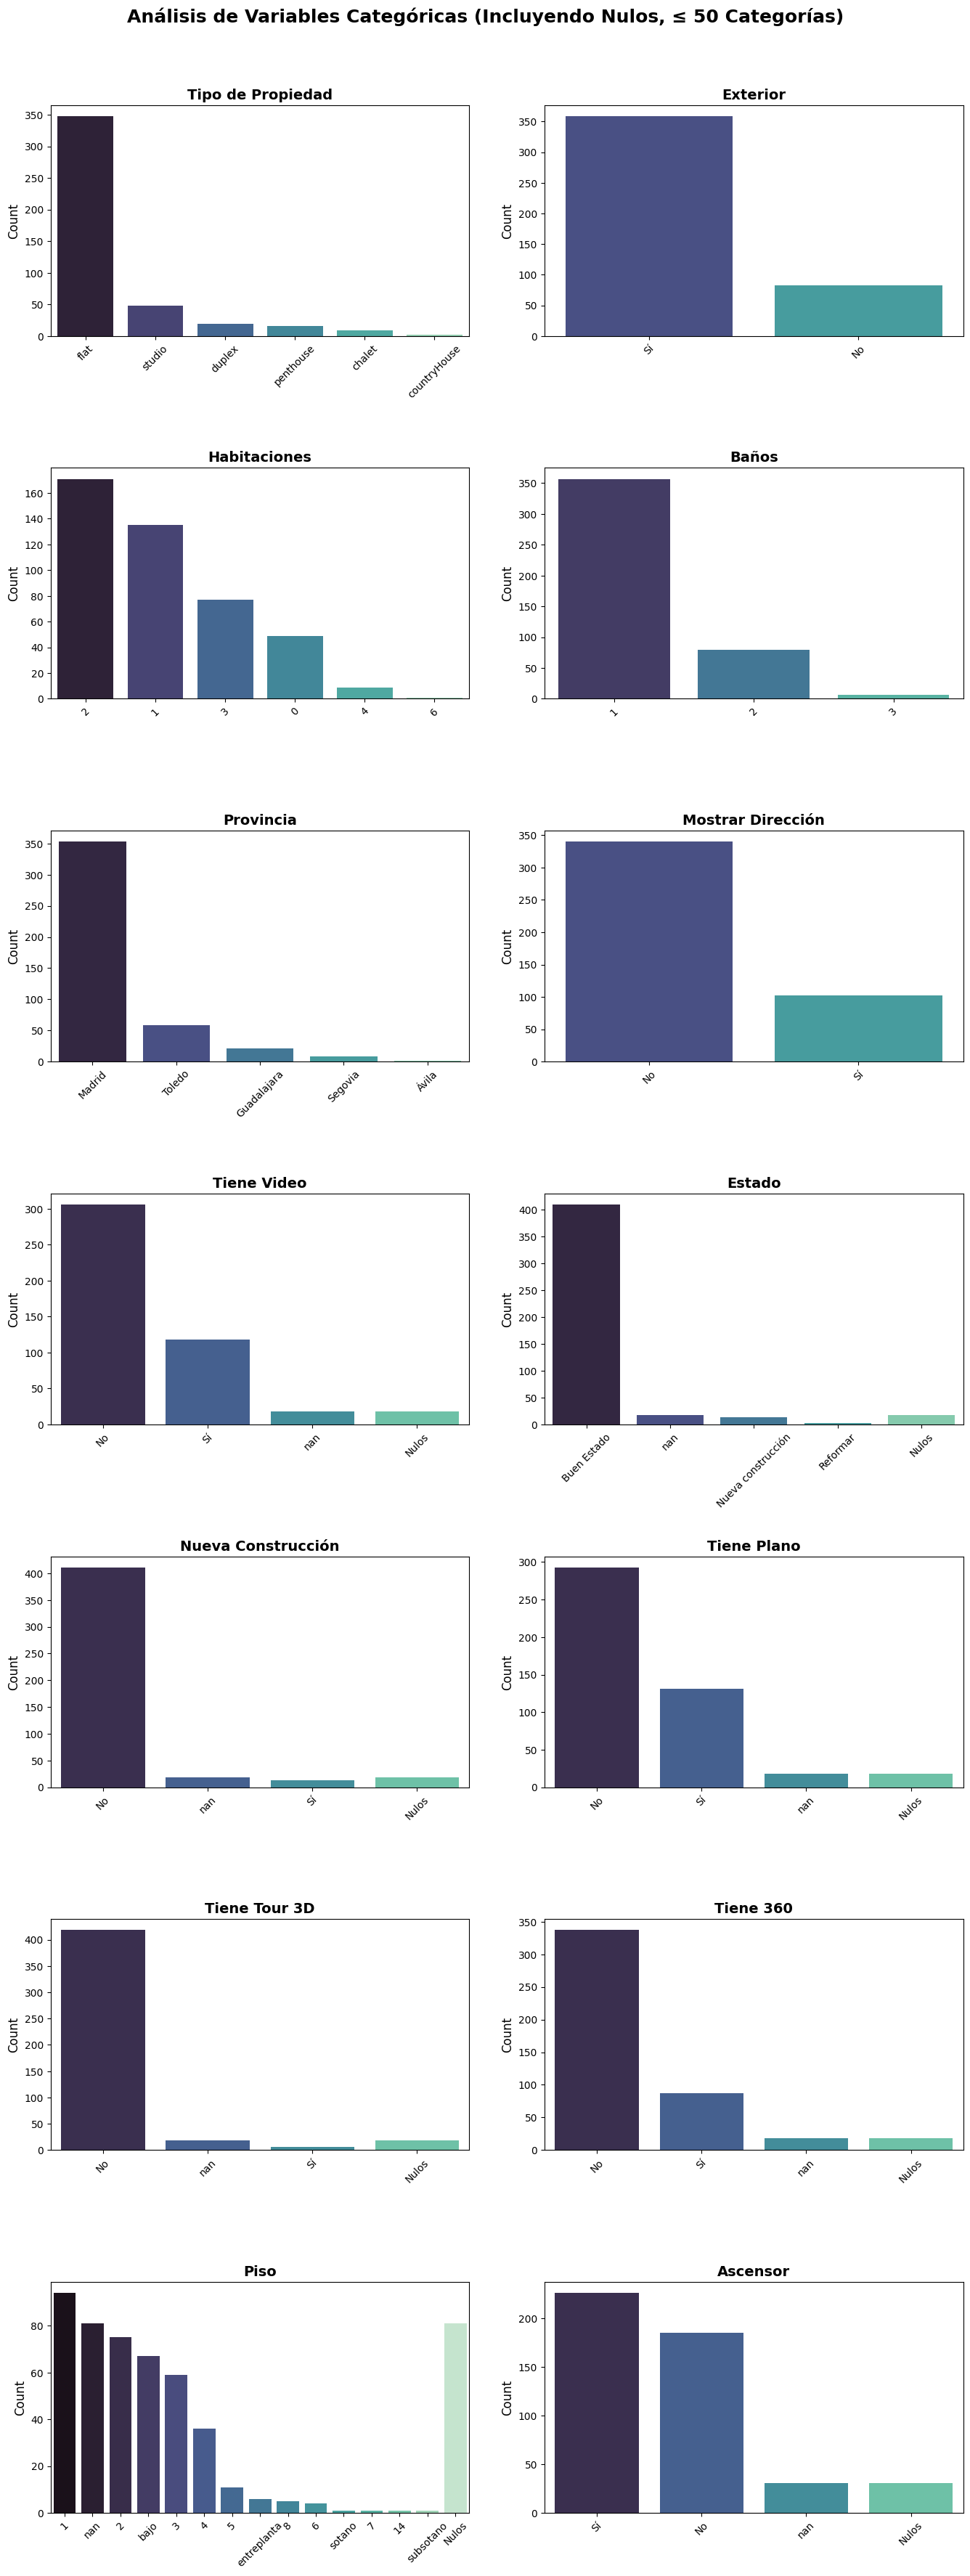

In [281]:
sp.plot_categoricas(df2,max_categories=50)

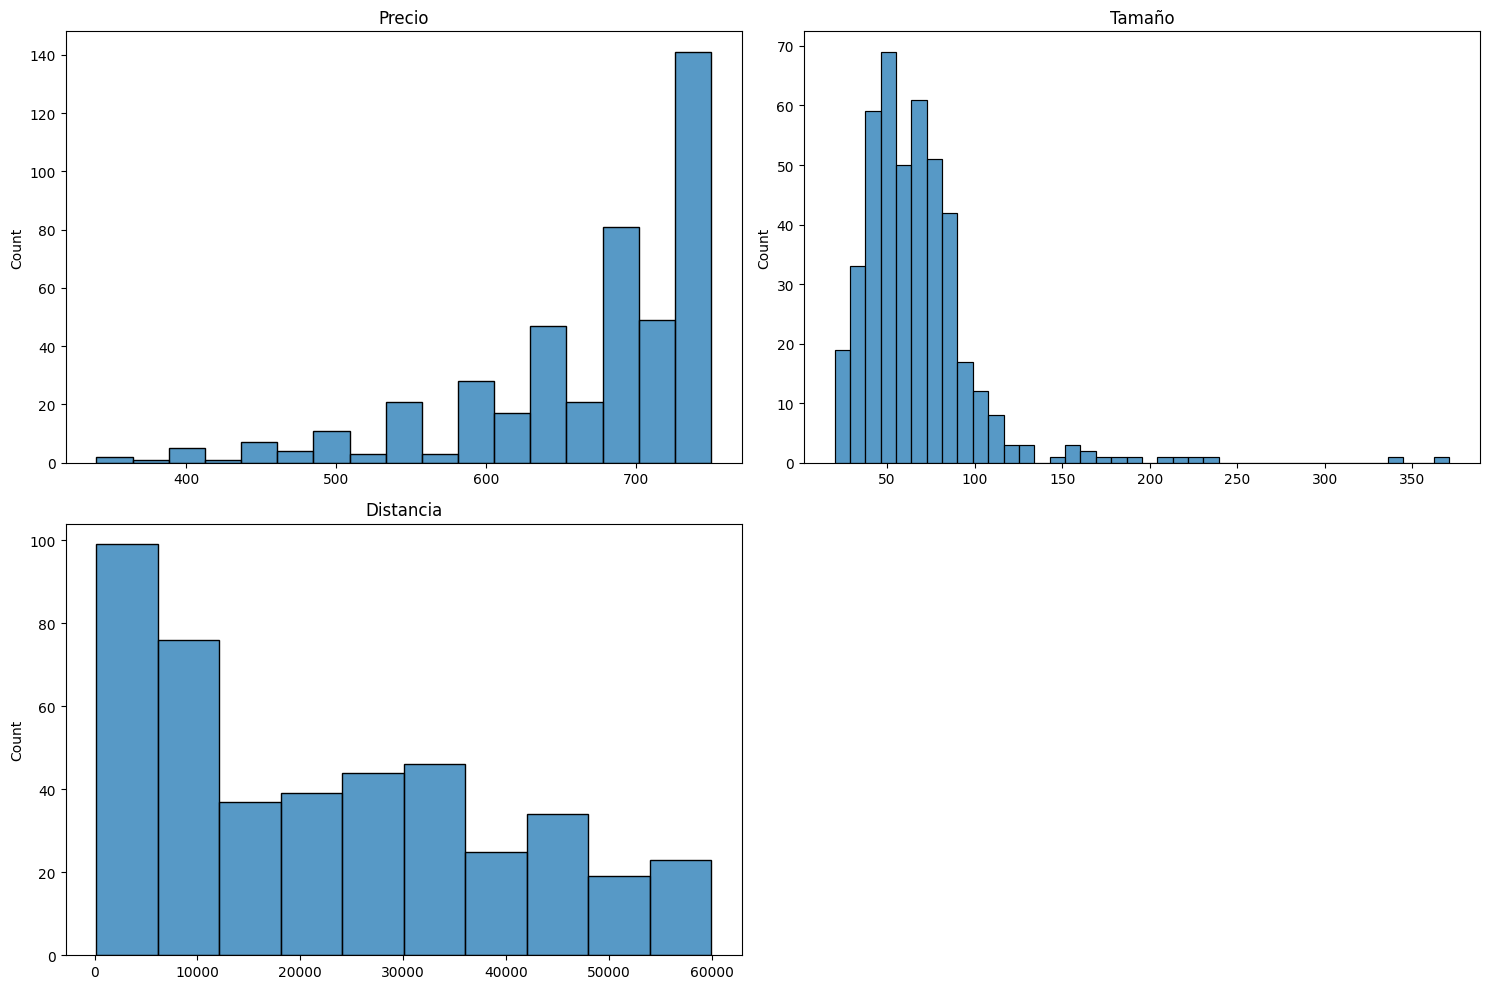

In [282]:
sp.plot_numericas(df2)

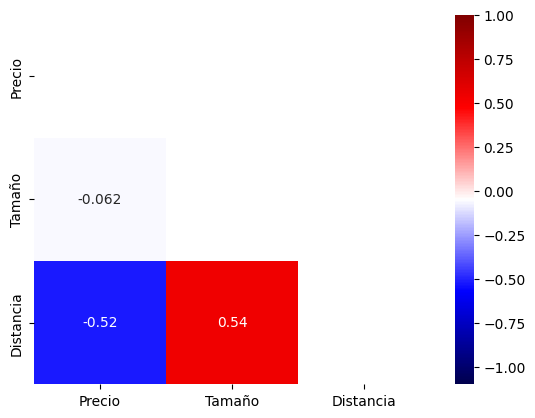

<Figure size 1000x1500 with 0 Axes>

In [283]:
sp.matriz_correlacion(df2)

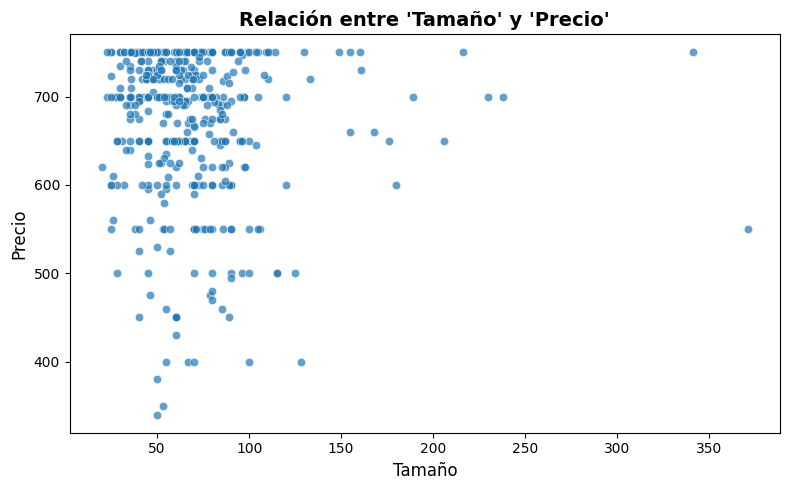

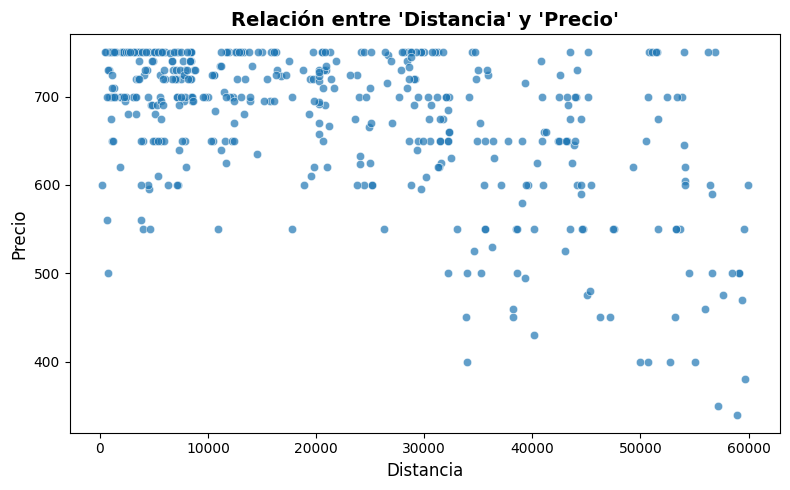

In [284]:
sp.relacion_vr_numericas_scatter(df2, "Precio")

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


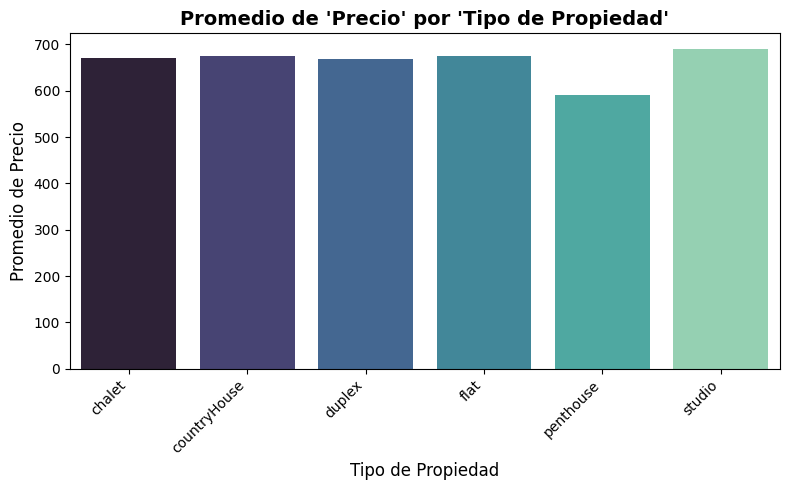

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


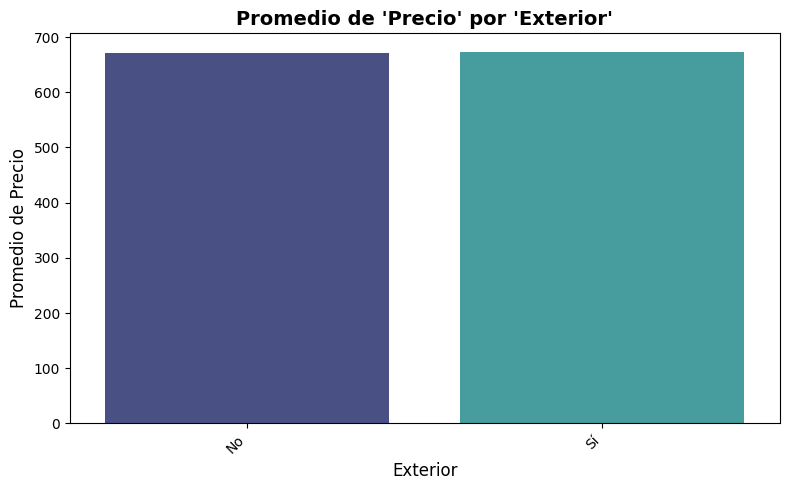

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


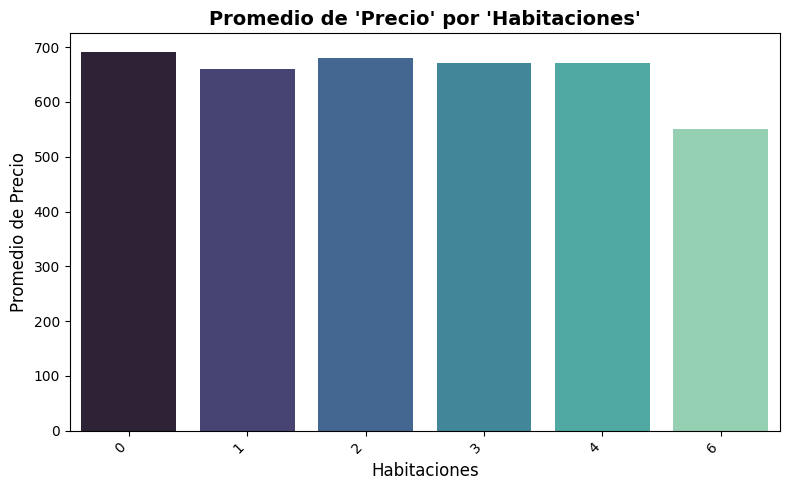

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


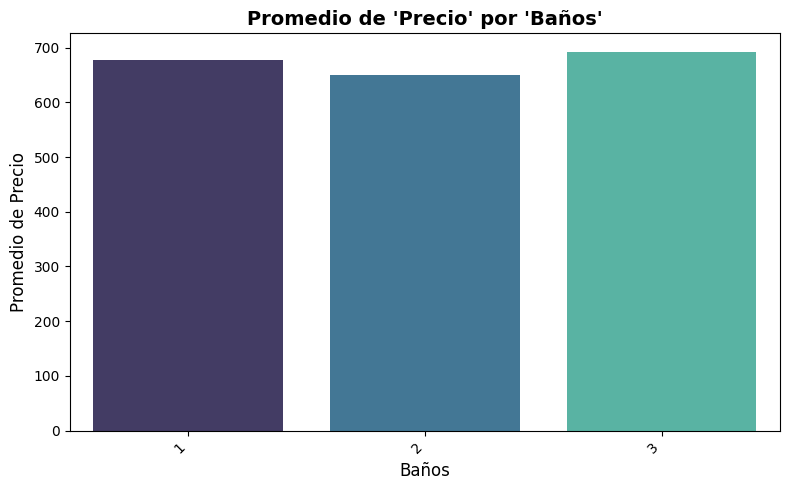

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


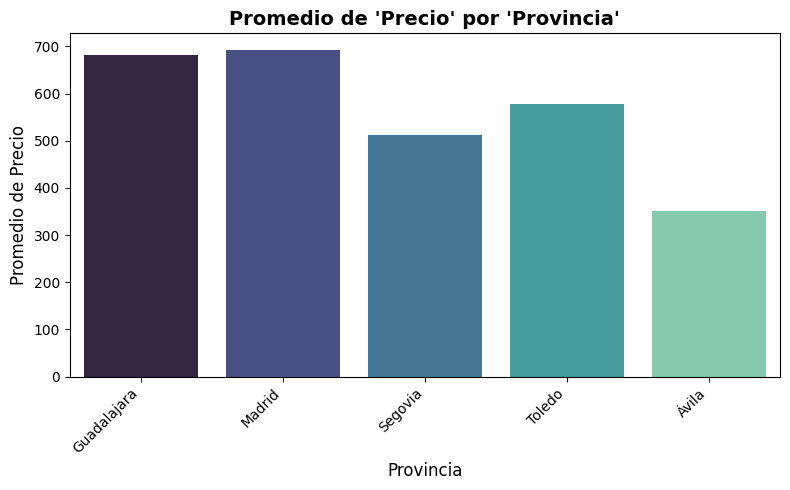

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


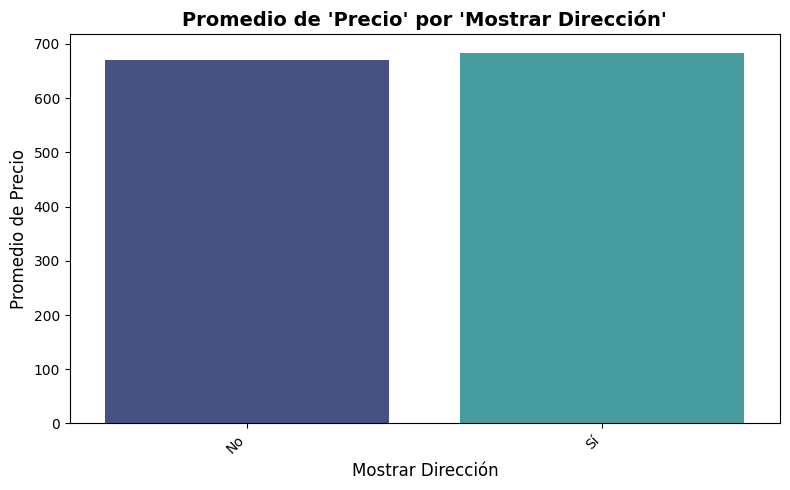

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


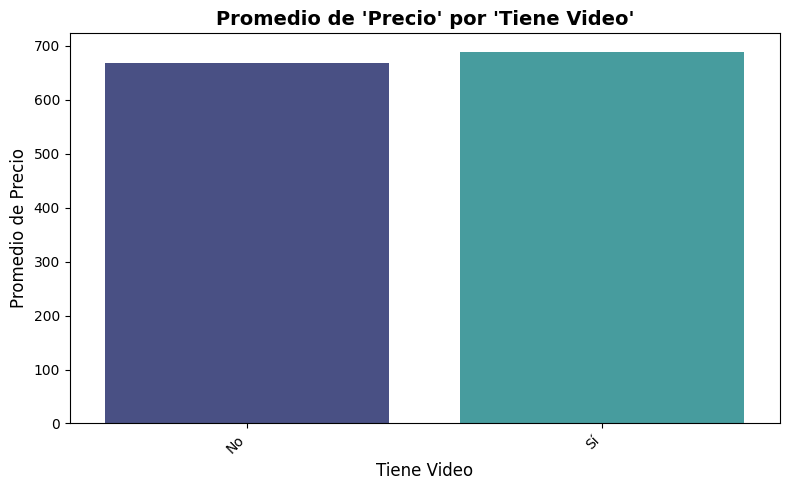

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


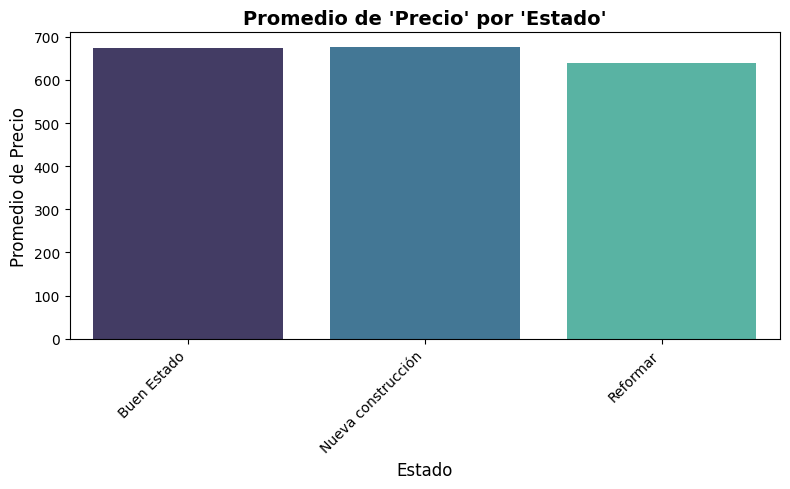

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


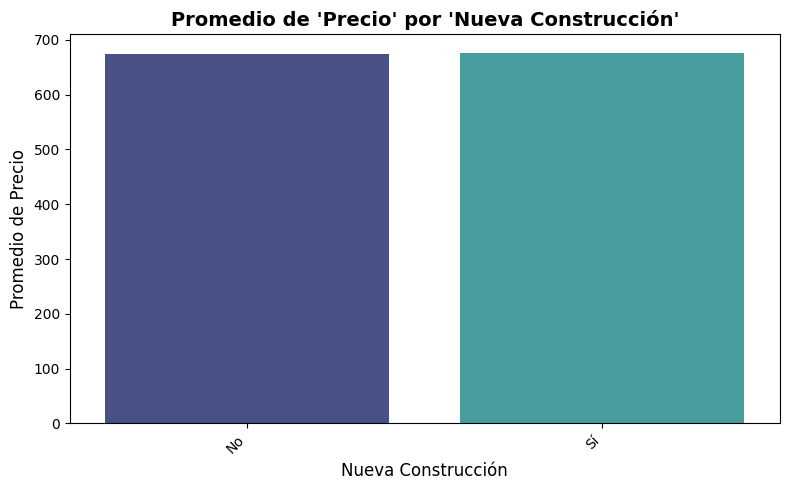

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


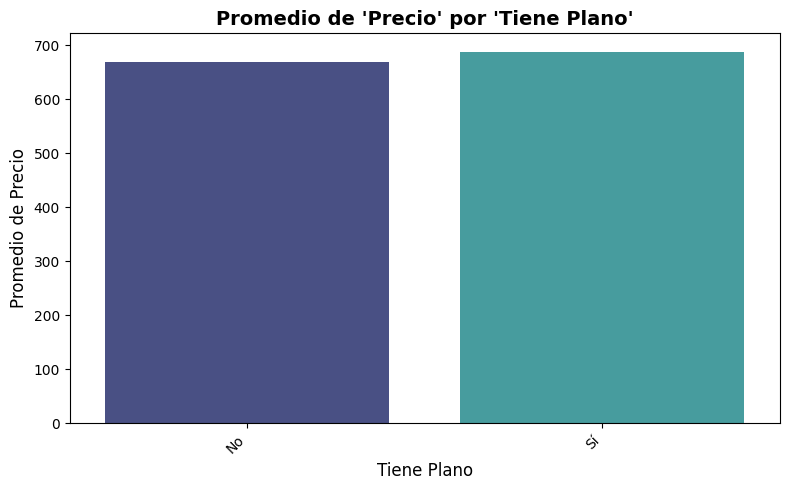

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


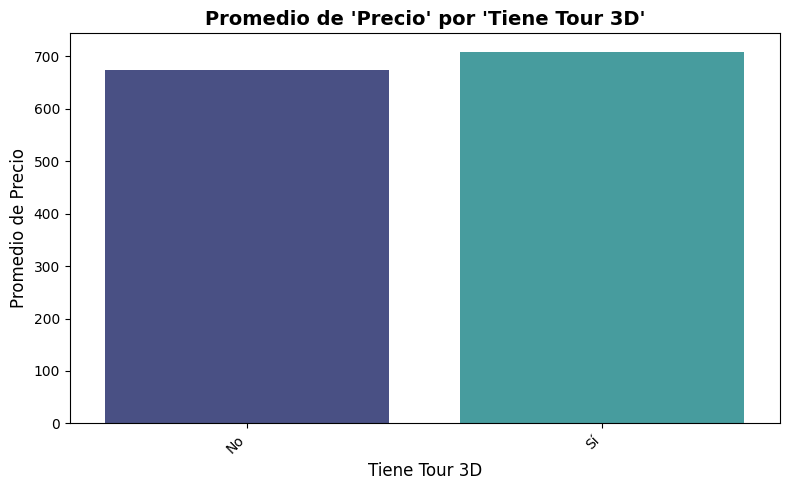

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


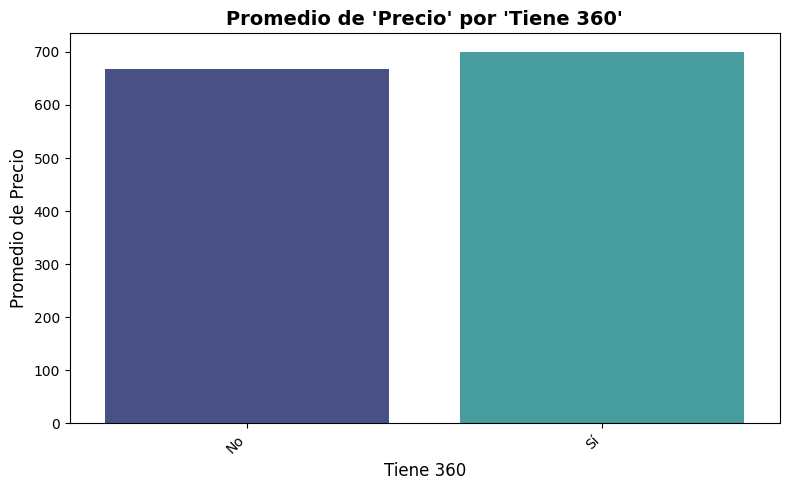

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


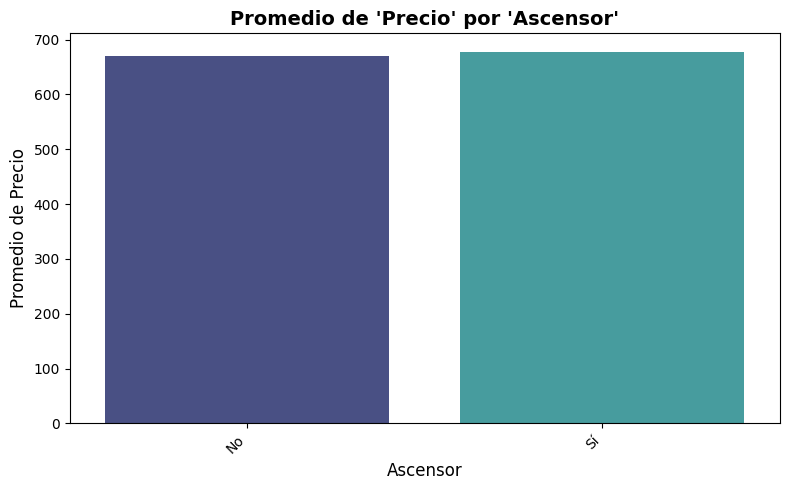

In [285]:
sp.relacion_vr_categoricas(df2, "Precio")

Procedemos a la imputacion de valores por los diferentes metodos:
1. Los métodos categoricos
2. Los métodos numéricos

Método categórico

In [286]:
# Vemos la cantidad actual que tenemos de nan
print(df2.isnull().sum())

Precio                 0
Tipo de Propiedad      0
Tamaño                 0
Exterior               0
Habitaciones           0
Baños                  0
Provincia              0
Municipio              0
Mostrar Dirección      0
Distancia              0
Tiene Video           18
Estado                18
Nueva Construcción    18
Tiene Plano           18
Tiene Tour 3D         18
Tiene 360             18
Piso                  81
Ascensor              31
dtype: int64


In [287]:
# Seleccionar solo columnas categóricas
categorical_columns = df2.select_dtypes(include="O")

# Detectar filas con valores nulos en estas columnas
datos_con_nulos = categorical_columns[categorical_columns.isnull().any(axis=1)]

df_filtrado = datos_con_nulos[datos_con_nulos.isnull().sum(axis=1) >= 3]
df_filtrado

Tipo de Propiedad Exterior Habitaciones Baños Provincia  \
7              studio       Sí            0     1    Madrid   
37               flat       Sí            3     2    Toledo   
66               flat       Sí            1     2    Madrid   
67             duplex       Sí            1     1    Madrid   
131              flat       Sí            1     1    Madrid   
137              flat       Sí            2     1    Toledo   
149              flat       Sí            1     2    Madrid   
169            studio       Sí            0     1    Madrid   
179            duplex       No            1     1    Madrid   
180            duplex       No            1     1    Madrid   
208              flat       No            1     1    Madrid   
221              flat       Sí            3     1    Madrid   
222              flat       Sí            2     1    Madrid   
230              flat       No            3     2    Madrid   
329              flat       Sí            1     1    Toledo   
339            duplex       Sí            2     1    Toledo   
341              flat       Sí            1     1    Madrid   
351              flat       Sí            3     1    Madrid   

                 Municipio Mostrar Dirección Tiene Video Estado  \
7                   Madrid                Sí         NaN    NaN   
37                Illescas                Sí         NaN    NaN   
66   Camarma de Esteruelas                No         NaN    NaN   
67                  Madrid                No         NaN    NaN   
131      Daganzo de Arriba                No         NaN    NaN   
137                  Ocaña                Sí         NaN    NaN   
149               El Álamo                No         NaN    NaN   
169                 Madrid                Sí         NaN    NaN   
179                 Madrid                No         NaN    NaN   
180                 Madrid                No         NaN    NaN   
208                 Madrid                Sí         NaN    NaN   
221                 Getafe                No         NaN    NaN   
222             Mataelpino                No         NaN    NaN   
230               Aranjuez                No         NaN    NaN   
329                Mocejón                Sí         NaN    NaN   
339    Alameda de la Sagra                No         NaN    NaN   
341                 Madrid                No         NaN    NaN   
351      Alcalá de Henares                No         NaN    NaN   

    Nueva Construcción Tiene Plano Tiene Tour 3D Tiene 360 Piso Ascensor  
7                  NaN         NaN           NaN       NaN  NaN      NaN  
37                 NaN         NaN           NaN       NaN  NaN      NaN  
66                 NaN         NaN           NaN       NaN  NaN      NaN  
67                 NaN         NaN           NaN       NaN  NaN      NaN  
131                NaN         NaN           NaN       NaN  NaN      NaN  
137                NaN         NaN           NaN       NaN  NaN      NaN  
149                NaN         NaN           NaN       NaN  NaN      NaN  
169                NaN         NaN           NaN       NaN  NaN      NaN  
179                NaN         NaN           NaN       NaN  NaN      NaN  
180                NaN         NaN           NaN       NaN  NaN      NaN  
208                NaN         NaN           NaN       NaN  NaN      NaN  
221                NaN         NaN           NaN       NaN  NaN      NaN  
222                NaN         NaN           NaN       NaN  NaN      NaN  
230                NaN         NaN           NaN       NaN  NaN      NaN  
329                NaN         NaN           NaN       NaN  NaN      NaN  
339                NaN         NaN           NaN       NaN  NaN      NaN  
341                NaN         NaN           NaN       NaN  NaN      NaN  
351                NaN         NaN           NaN       NaN  NaN      NaN

In [288]:
df2=df2.drop(index = df_filtrado.index).reset_index(drop=True)

Creamos una nueva categoria de desconocido para estos casos, considerando que puede ser que no se conozcan estas variables

In [289]:
# Seleccionamos las columnas categóricas
categorical_columns = df2.select_dtypes(include="O").columns

# Imputamos la categoría 'desconocido' en los valores nulos de todas las columnas categóricas
df2[categorical_columns] = df2[categorical_columns].apply(lambda x: x.fillna("desconocido"))

# Verificamos que no haya valores nulos
print(df2.isnull().sum())

Precio                0
Tipo de Propiedad     0
Tamaño                0
Exterior              0
Habitaciones          0
Baños                 0
Provincia             0
Municipio             0
Mostrar Dirección     0
Distancia             0
Tiene Video           0
Estado                0
Nueva Construcción    0
Tiene Plano           0
Tiene Tour 3D         0
Tiene 360             0
Piso                  0
Ascensor              0
dtype: int64


C:\Users\alexc\AppData\Local\Temp\ipykernel_7792\649264639.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[categorical_columns] = df2[categorical_columns].apply(lambda x: x.fillna("desconocido"))


In [290]:
# Definimos las variables Habitaciones y Baños como categoricas por contar con poca indicencia de valores y contar con apenas 3-4 opciones
df2['Habitaciones'] = df2['Habitaciones'].astype('object')
df2['Baños'] = df2['Baños'].astype('object')
df2.dtypes

Precio                float64
Tipo de Propiedad      object
Tamaño                float64
Exterior               object
Habitaciones           object
Baños                  object
Provincia              object
Municipio              object
Mostrar Dirección      object
Distancia               int64
Tiene Video            object
Estado                 object
Nueva Construcción     object
Tiene Plano            object
Tiene Tour 3D          object
Tiene 360              object
Piso                   object
Ascensor               object
dtype: object

### Gestion de Outiers

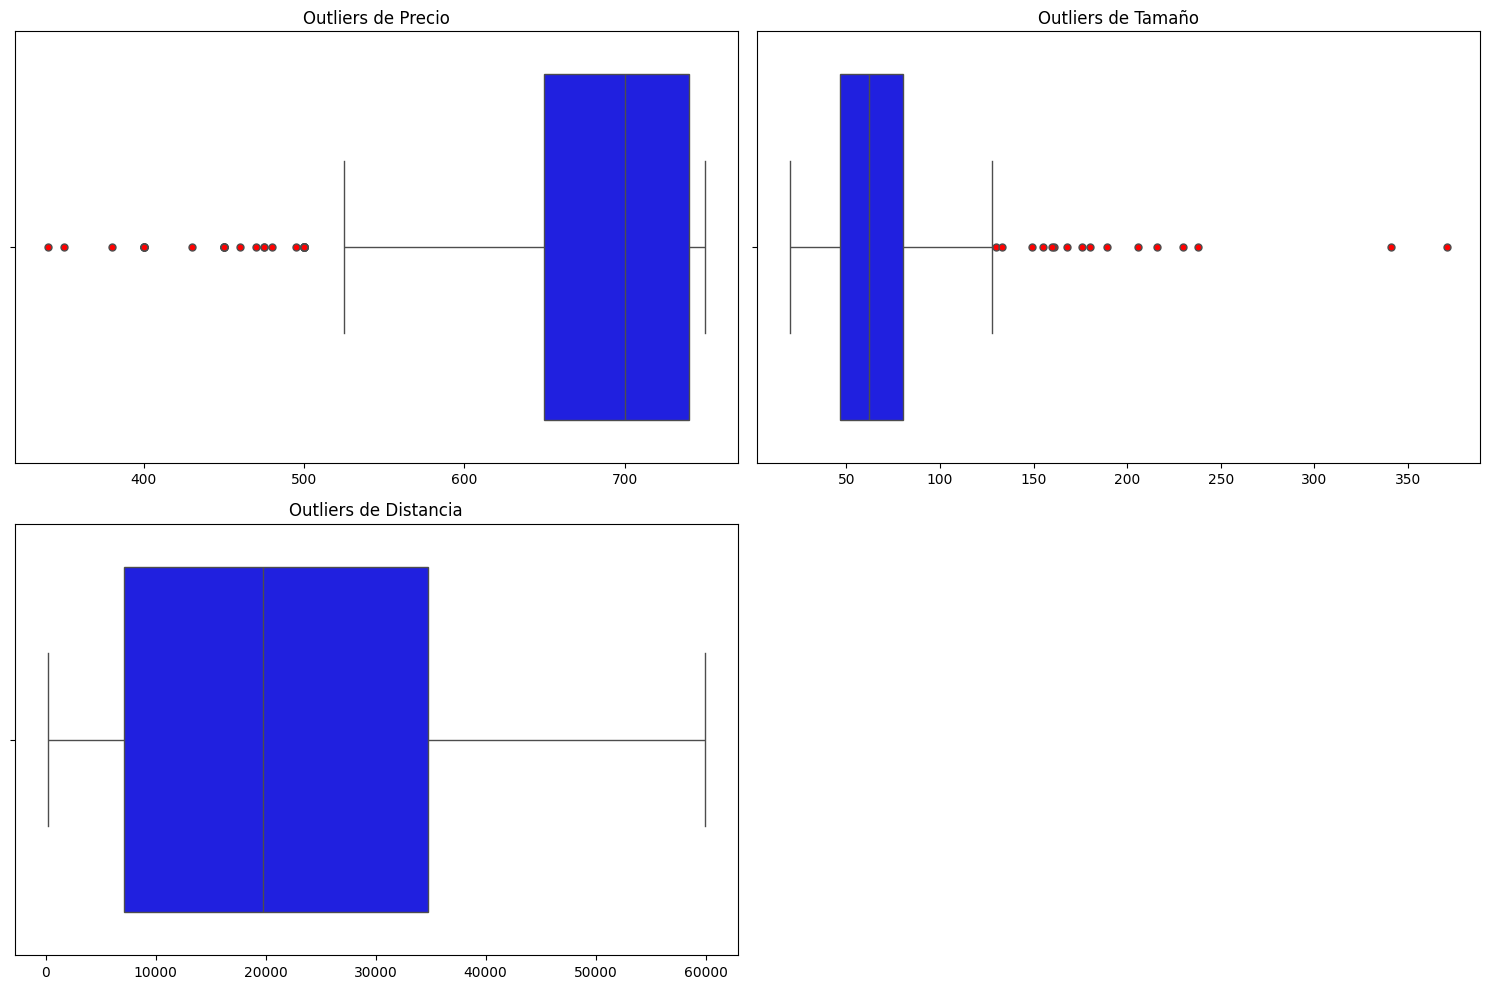

In [291]:
sp.detectar_outliers(df2)

In [292]:
col_numericas=['Tamaño', 'Distancia']
lista_vecinos=[5, 20, 50]
list_contaminacion = [0.01, 0.05, 0.1]

df_lof = df2.copy()
df_lof = sp.gestion_nulos_lof(df_lof, col_numericas, lista_vecinos, list_contaminacion)

Aplicando LOF con diferentes parámetros: 100%|██████████| 9/9 [00:00<00:00, 42.47it/s]


In [293]:
df_lof.describe().T

count          mean           std    min      25%  \
Precio                424.0    674.094340     84.102833  340.0   650.00   
Tamaño                424.0     68.073113     36.085512   20.0    46.75   
Distancia             424.0  22177.160377  16937.260387  183.0  7076.25   
outliers_lof_5_0.01   424.0      0.976415      0.216157   -1.0     1.00   
outliers_lof_5_0.05   424.0      0.896226      0.444121   -1.0     1.00   
outliers_lof_5_0.1    424.0      0.797170      0.604468   -1.0     1.00   
outliers_lof_20_0.01  424.0      0.976415      0.216157   -1.0     1.00   
outliers_lof_20_0.05  424.0      0.896226      0.444121   -1.0     1.00   
outliers_lof_20_0.1   424.0      0.797170      0.604468   -1.0     1.00   
outliers_lof_50_0.01  424.0      0.976415      0.216157   -1.0     1.00   
outliers_lof_50_0.05  424.0      0.896226      0.444121   -1.0     1.00   
outliers_lof_50_0.1   424.0      0.797170      0.604468   -1.0     1.00   

                          50%       75%      max  
Precio                  700.0    740.00    750.0  
Tamaño                   62.0     80.00    371.0  
Distancia             19766.0  34792.25  59919.0  
outliers_lof_5_0.01       1.0      1.00      1.0  
outliers_lof_5_0.05       1.0      1.00      1.0  
outliers_lof_5_0.1        1.0      1.00      1.0  
outliers_lof_20_0.01      1.0      1.00      1.0  
outliers_lof_20_0.05      1.0      1.00      1.0  
outliers_lof_20_0.1       1.0      1.00      1.0  
outliers_lof_50_0.01      1.0      1.00      1.0  
outliers_lof_50_0.05      1.0      1.00      1.0  
outliers_lof_50_0.1       1.0      1.00      1.0

In [294]:
combinaciones_variables = list(combinations(['Tamaño', 'Distancia','Precio'], 2))
columnas_hue = df_lof.filter(like="outlier").columns


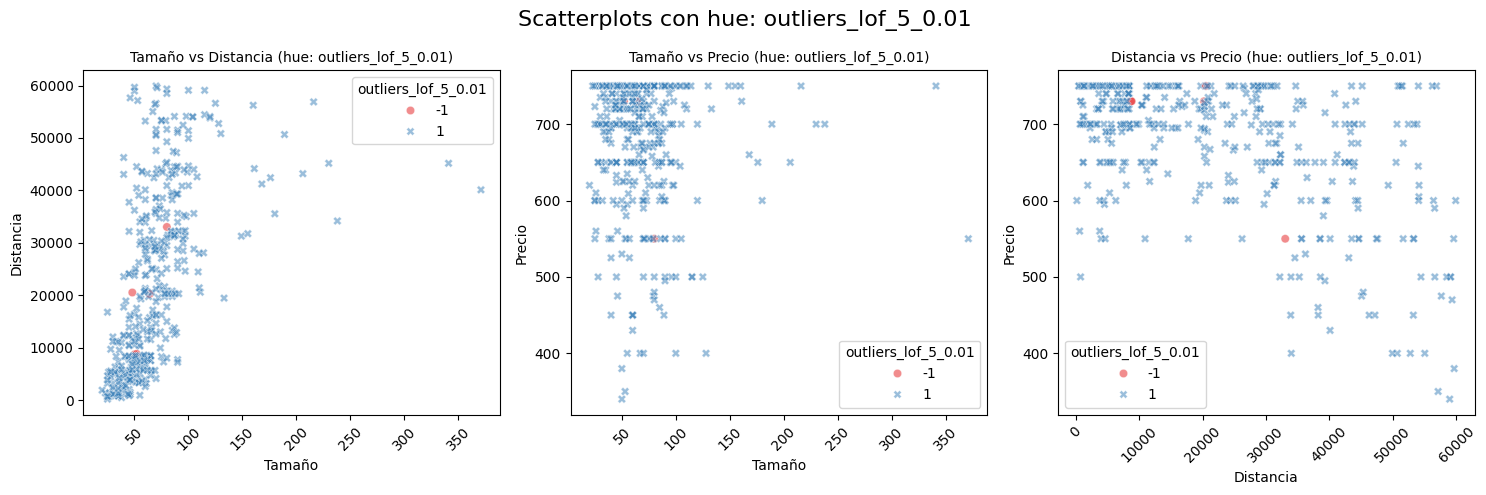

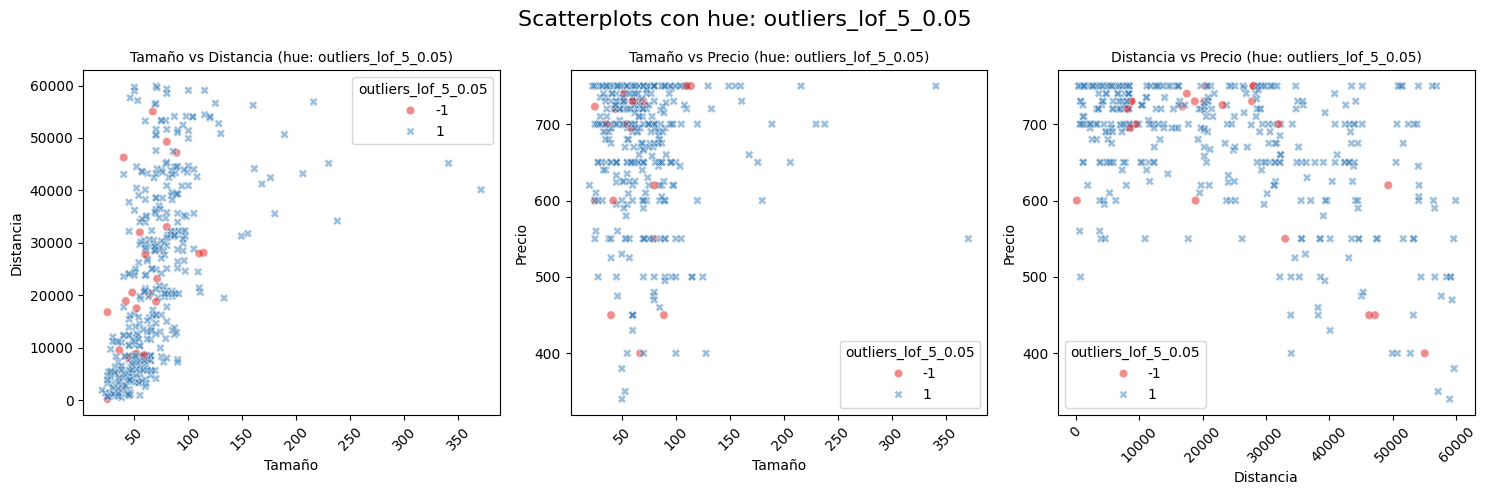

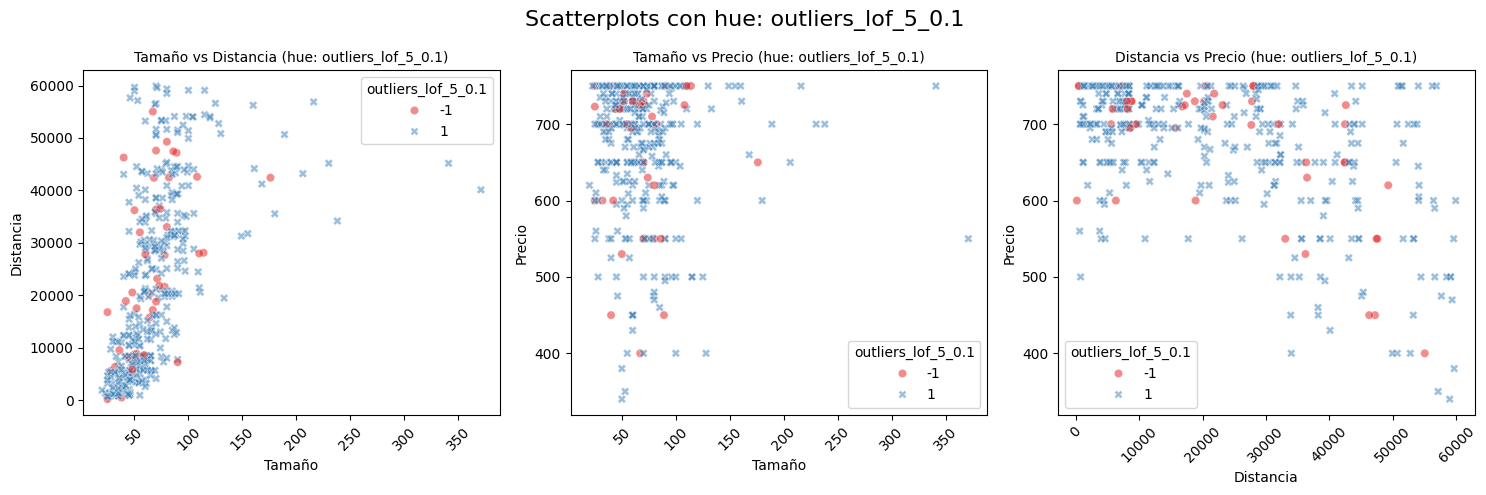

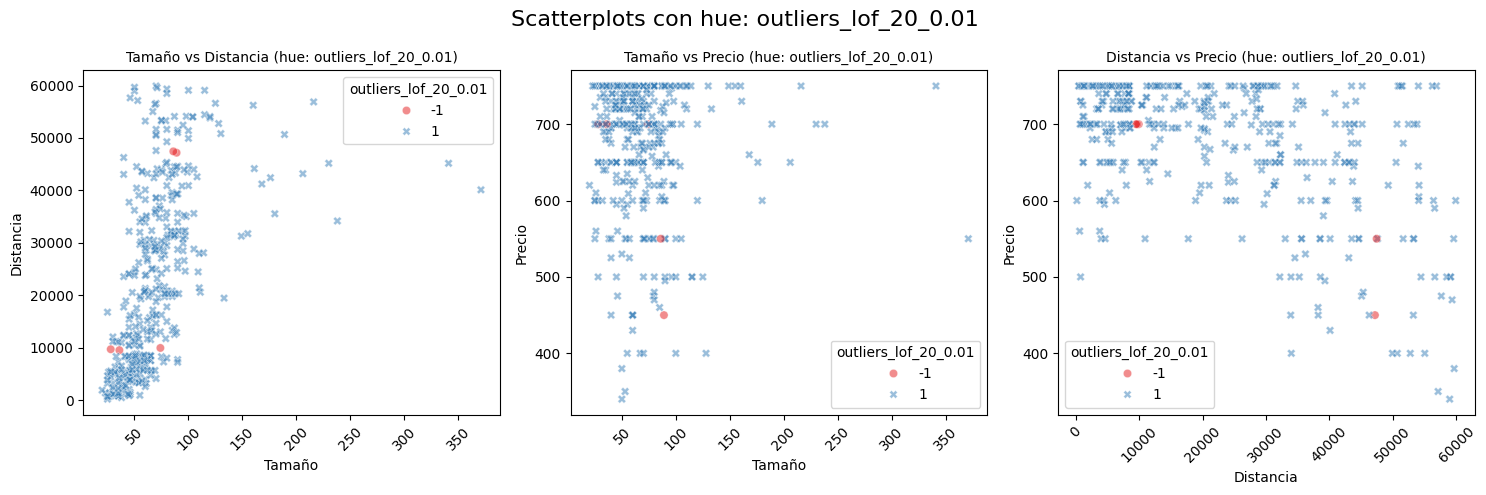

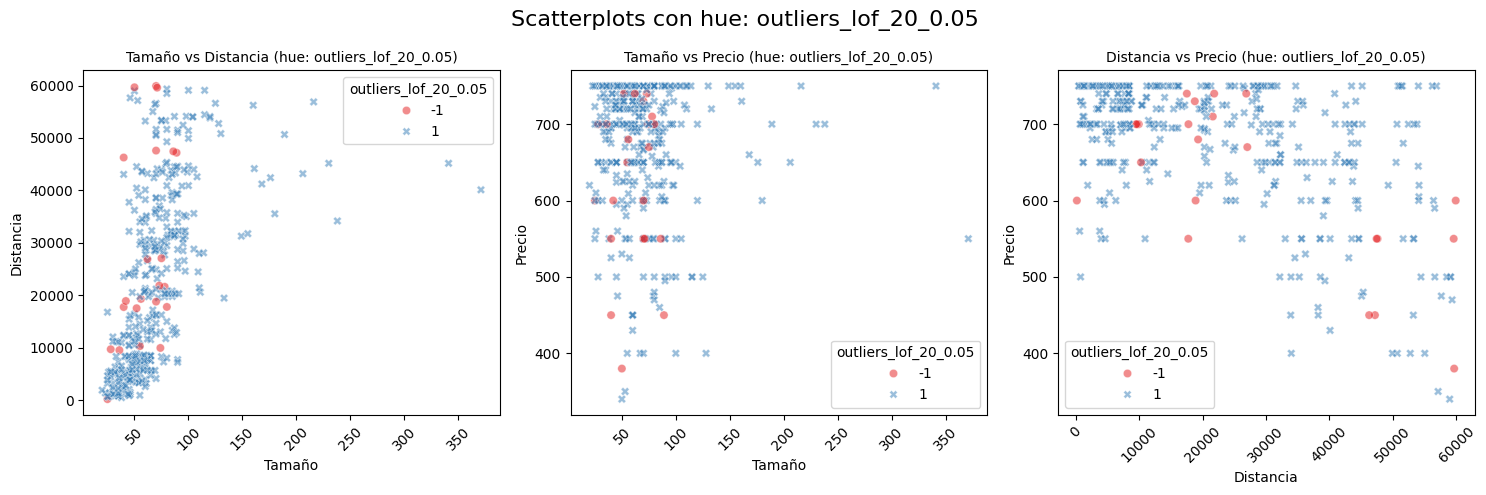

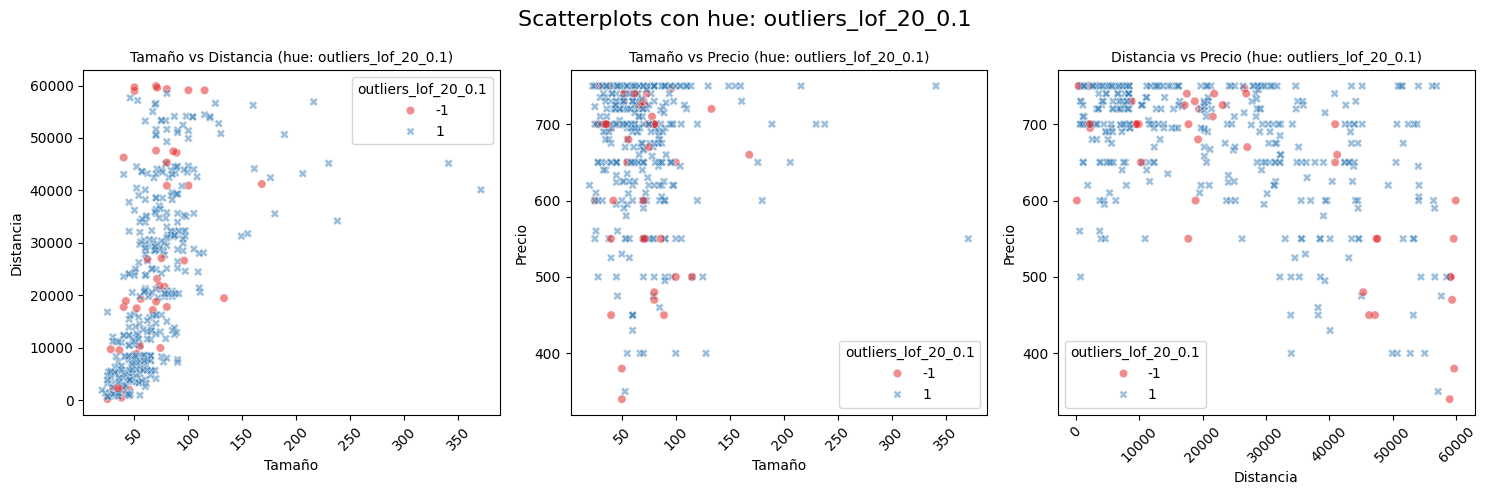

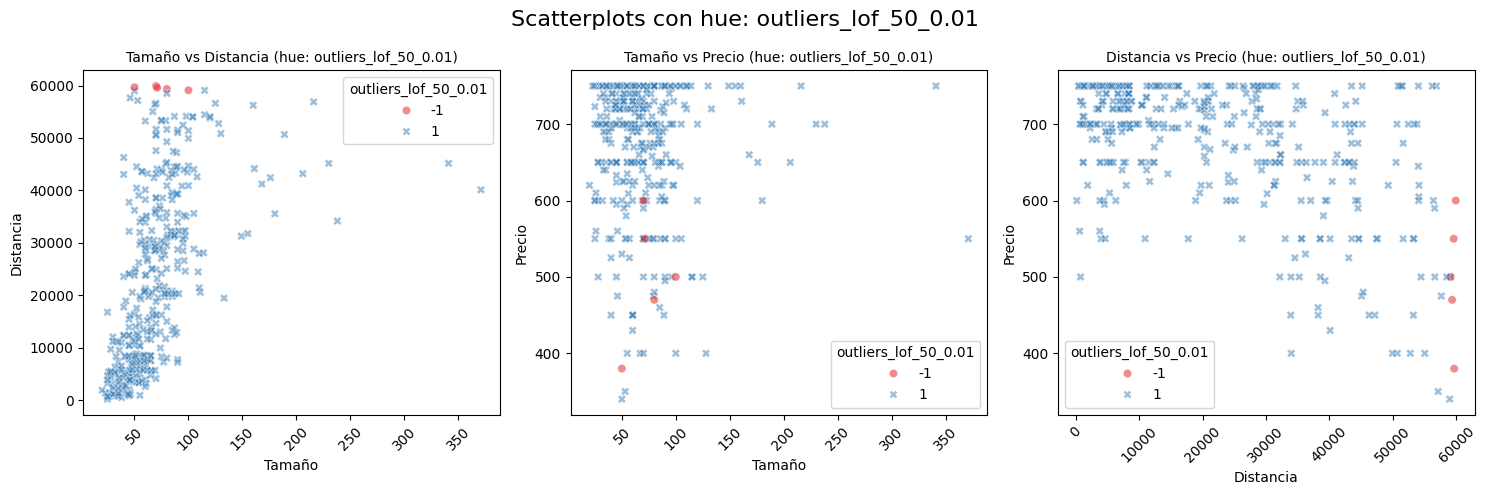

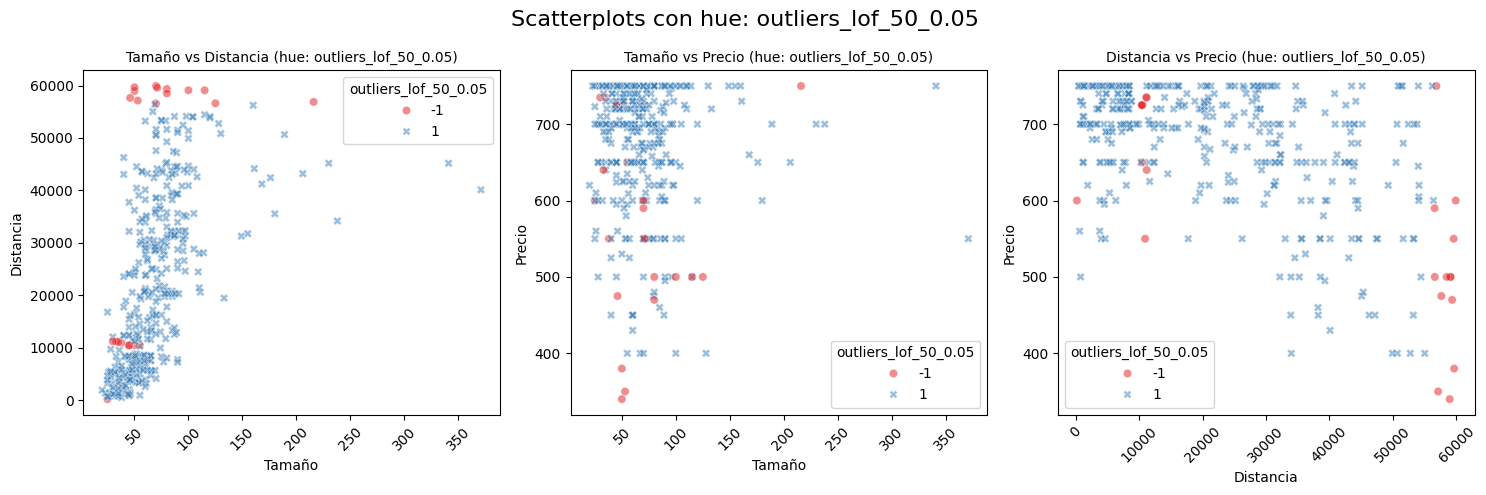

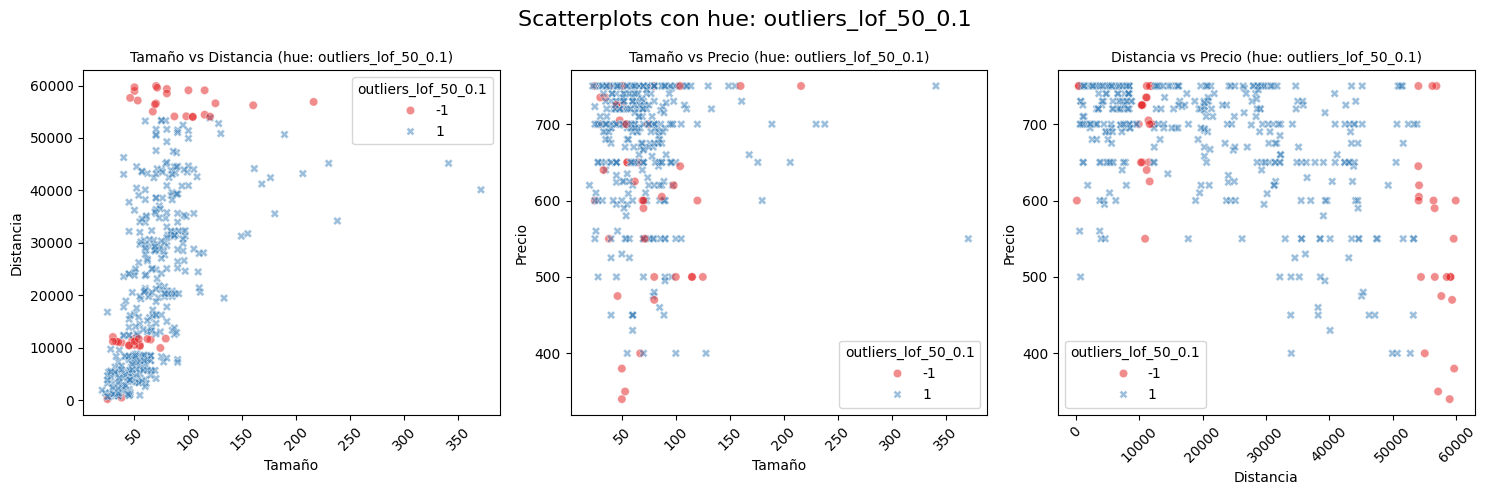

In [295]:
sp.scatterplot_outliers(df_lof,combinaciones_variables,columnas_hue)

In [296]:
cantidad = 4
df_filtrado2 = df_lof[(df_lof == -1).sum(axis=1) > cantidad]
df_filtrado2

Precio Tipo de Propiedad  Tamaño Exterior Habitaciones Baños Provincia  \
4     450.0              flat    89.0       No            2     1    Toledo   
128   600.0         penthouse    25.0       Sí            1     1    Madrid   
315   600.0              flat    70.0       Sí            3     1   Segovia   
328   700.0              flat    36.0       Sí            2     1    Madrid   
341   380.0         penthouse    50.0       Sí            1     1   Segovia   
343   550.0              flat    71.0       Sí            1     1   Segovia   

                     Municipio Mostrar Dirección  Distancia Tiene Video  \
4                        Recas                No      47186          No   
128                     Madrid                Sí        183          No   
315  San Ildefonso o la Granja                No      59919          No   
328         Pozuelo de Alarcón                No       9525          No   
341  San Ildefonso o la Granja                No      59674          No   
343  San Ildefonso o la Granja                No      59601          No   

          Estado Nueva Construcción Tiene Plano Tiene Tour 3D Tiene 360  Piso  \
4    Buen Estado                 No          No            No        No     2   
128  Buen Estado                 No          Sí            No        Sí     5   
315  Buen Estado                 No          No            No        No     2   
328  Buen Estado                 No          No            No        No     3   
341  Buen Estado                 No          No            No        No     5   
343  Buen Estado                 No          No            No        No  bajo   

    Ascensor  outliers_lof_5_0.01  outliers_lof_5_0.05  outliers_lof_5_0.1  \
4         Sí                    1                   -1                  -1   
128       Sí                    1                   -1                  -1   
315       No                    1                    1                   1   
328       No                    1                   -1                  -1   
341       No                    1                    1                   1   
343       No                    1                    1                   1   

     outliers_lof_20_0.01  outliers_lof_20_0.05  outliers_lof_20_0.1  \
4                      -1                    -1                   -1   
128                     1                    -1                   -1   
315                     1                    -1                   -1   
328                    -1                    -1                   -1   
341                     1                    -1                   -1   
343                     1                    -1                   -1   

     outliers_lof_50_0.01  outliers_lof_50_0.05  outliers_lof_50_0.1  
4                       1                     1                    1  
128                     1                    -1                   -1  
315                    -1                    -1                   -1  
328                     1                     1                    1  
341                    -1                    -1                   -1  
343                    -1                    -1                   -1

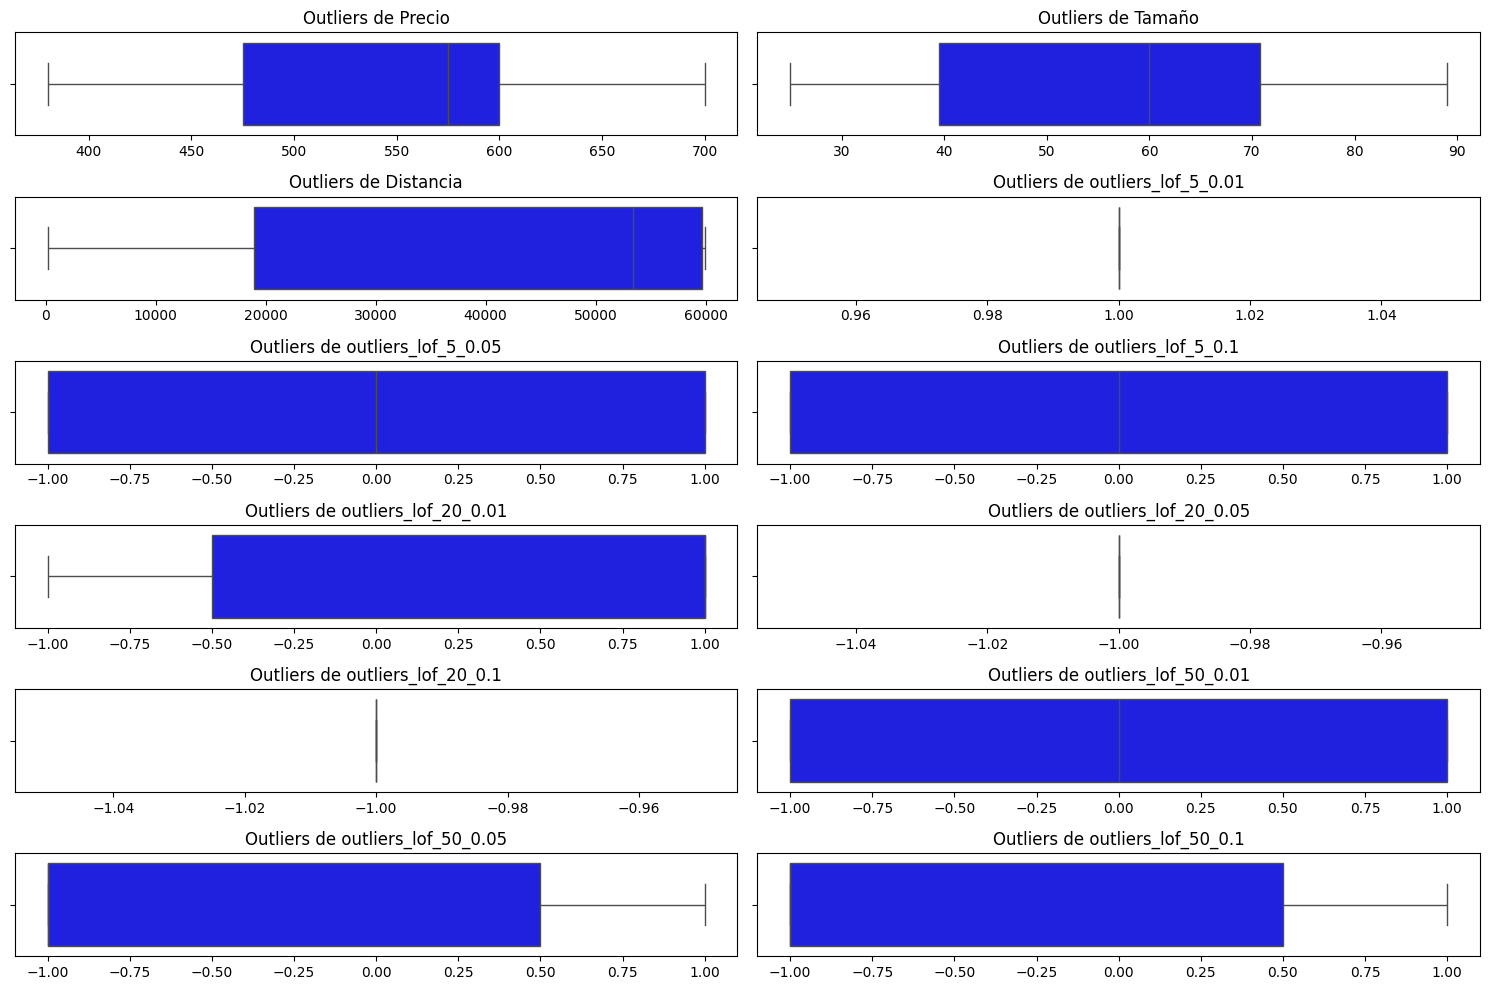

In [297]:
sp.detectar_outliers(df_filtrado2)

In [298]:
df_filtrado2.describe().T

count          mean           std    min       25%  \
Precio                  6.0    546.666667    115.181017  380.0    475.00   
Tamaño                  6.0     56.833333     24.094951   25.0     39.50   
Distancia               6.0  39348.000000  27317.536946  183.0  18940.25   
outliers_lof_5_0.01     6.0      1.000000      0.000000    1.0      1.00   
outliers_lof_5_0.05     6.0      0.000000      1.095445   -1.0     -1.00   
outliers_lof_5_0.1      6.0      0.000000      1.095445   -1.0     -1.00   
outliers_lof_20_0.01    6.0      0.333333      1.032796   -1.0     -0.50   
outliers_lof_20_0.05    6.0     -1.000000      0.000000   -1.0     -1.00   
outliers_lof_20_0.1     6.0     -1.000000      0.000000   -1.0     -1.00   
outliers_lof_50_0.01    6.0      0.000000      1.095445   -1.0     -1.00   
outliers_lof_50_0.05    6.0     -0.333333      1.032796   -1.0     -1.00   
outliers_lof_50_0.1     6.0     -0.333333      1.032796   -1.0     -1.00   

                          50%       75%      max  
Precio                  575.0    600.00    700.0  
Tamaño                   60.0     70.75     89.0  
Distancia             53393.5  59655.75  59919.0  
outliers_lof_5_0.01       1.0      1.00      1.0  
outliers_lof_5_0.05       0.0      1.00      1.0  
outliers_lof_5_0.1        0.0      1.00      1.0  
outliers_lof_20_0.01      1.0      1.00      1.0  
outliers_lof_20_0.05     -1.0     -1.00     -1.0  
outliers_lof_20_0.1      -1.0     -1.00     -1.0  
outliers_lof_50_0.01      0.0      1.00      1.0  
outliers_lof_50_0.05     -1.0      0.50      1.0  
outliers_lof_50_0.1      -1.0      0.50      1.0

In [299]:
df_lof.describe().T

count          mean           std    min      25%  \
Precio                424.0    674.094340     84.102833  340.0   650.00   
Tamaño                424.0     68.073113     36.085512   20.0    46.75   
Distancia             424.0  22177.160377  16937.260387  183.0  7076.25   
outliers_lof_5_0.01   424.0      0.976415      0.216157   -1.0     1.00   
outliers_lof_5_0.05   424.0      0.896226      0.444121   -1.0     1.00   
outliers_lof_5_0.1    424.0      0.797170      0.604468   -1.0     1.00   
outliers_lof_20_0.01  424.0      0.976415      0.216157   -1.0     1.00   
outliers_lof_20_0.05  424.0      0.896226      0.444121   -1.0     1.00   
outliers_lof_20_0.1   424.0      0.797170      0.604468   -1.0     1.00   
outliers_lof_50_0.01  424.0      0.976415      0.216157   -1.0     1.00   
outliers_lof_50_0.05  424.0      0.896226      0.444121   -1.0     1.00   
outliers_lof_50_0.1   424.0      0.797170      0.604468   -1.0     1.00   

                          50%       75%      max  
Precio                  700.0    740.00    750.0  
Tamaño                   62.0     80.00    371.0  
Distancia             19766.0  34792.25  59919.0  
outliers_lof_5_0.01       1.0      1.00      1.0  
outliers_lof_5_0.05       1.0      1.00      1.0  
outliers_lof_5_0.1        1.0      1.00      1.0  
outliers_lof_20_0.01      1.0      1.00      1.0  
outliers_lof_20_0.05      1.0      1.00      1.0  
outliers_lof_20_0.1       1.0      1.00      1.0  
outliers_lof_50_0.01      1.0      1.00      1.0  
outliers_lof_50_0.05      1.0      1.00      1.0  
outliers_lof_50_0.1       1.0      1.00      1.0

In [300]:
# Eliminamos los outiers al considerarse pocos y que por esa variable puedan modificar el modelo
df2=df2.drop(index = df_filtrado2.index).reset_index(drop=True)

In [301]:
df2.shape

(418, 18)

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  combined_counts = pd.concat([category_counts, null_series])
c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer

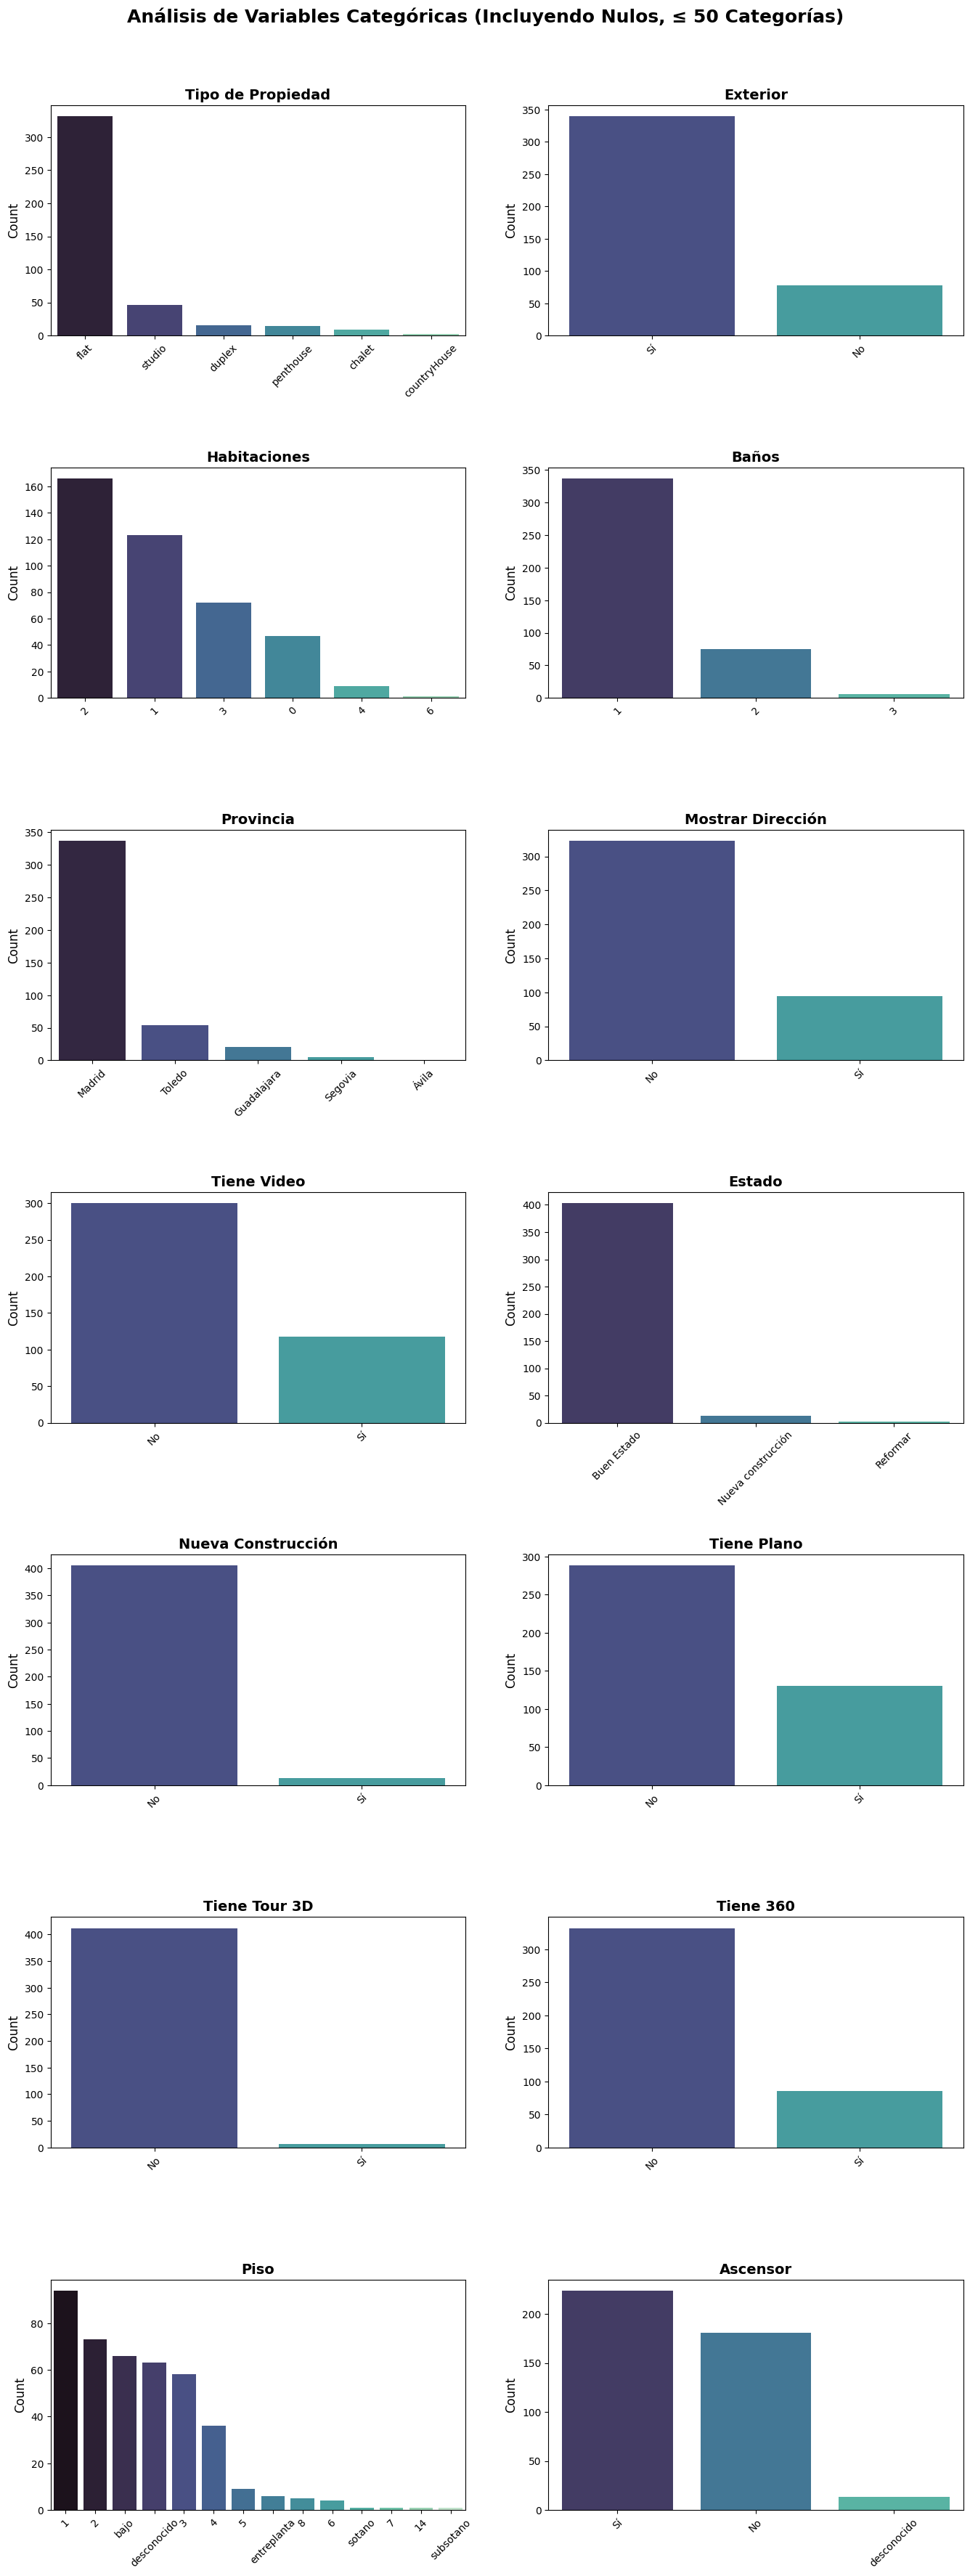

In [302]:
sp.plot_categoricas(df2,max_categories=50)

In [303]:
# Vamos a revisar si sobre ciertas variables tenemos suficientes valores como para sostener la variable en el modelo, vamos a estudiar que se tenga en principio un 5% de los valores de ese tipo de categoria
condiciones_outiers=sp.detectar_outliers_categoricos(df2, threshold=0.04)
condiciones_outiers

{'Tipo de Propiedad': ['duplex', 'penthouse', 'chalet', 'countryHouse'],
 'Habitaciones': [4, 6],
 'Baños': [3],
 'Provincia': ['Segovia', 'Ávila'],
 'Municipio': ['Seseña',
  'Parla',
  'Torrejón de Ardoz',
  'Aranjuez',
  'Getafe',
  'Guadalajara',
  'Valdemoro',
  'San Sebastián de los Reyes',
  'Yebes',
  'Alcorcón',
  'Collado Villalba',
  'Coslada',
  'Colmenar Viejo',
  'Yeles',
  'Fuensalida',
  'Pinto',
  'El Espinar',
  'Arganda',
  'Illescas',
  'Villanueva del Pardillo',
  'Casarrubios del Monte',
  'Guadarrama',
  'Miraflores de la Sierra',
  'Cobeña',
  'Móstoles',
  'Yuncos',
  'Leganés',
  'Tres Cantos',
  'Rivas-Vaciamadrid',
  'Fuenlabrada',
  'Valdemorillo',
  'Aldea del Fresno',
  'Camarena',
  'El Viso de San Juan',
  'Cedillo del Condado',
  'Azuqueca de Henares',
  'San Lorenzo de el Escorial',
  'Yuncler',
  'Navalcarnero',
  'Colmenarejo',
  'Alovera',
  'Campo Real',
  'Robledo de Chavela',
  'Villa del Prado',
  'San Fernando de Henares',
  'Calypo Fado',
  '

Observamos que hay algunas de las variables elegidas que apenas cuentan con datos en muchos tipos de su categoria que nos permitan incluirlo y se opta por quitar la variable antes que quitar dichos outiers

In [304]:
df3=df2.copy()
df3=df2.drop(columns=["Municipio","Piso","Tiene Tour 3D","Estado", 'Nueva Construcción'])

In [305]:
# Volvemos a detectar outiers en variables categoricas ahora sin las variables descartadas previas
condiciones_outiers=sp.detectar_outliers_categoricos(df3, threshold=0.1)
condiciones_outiers

{'Tipo de Propiedad': ['duplex', 'penthouse', 'chalet', 'countryHouse'],
 'Habitaciones': [4, 6],
 'Baños': [3],
 'Provincia': ['Guadalajara', 'Segovia', 'Ávila'],
 'Ascensor': ['desconocido']}

In [306]:
# Obtenemos un df con los supuestos outiers que cumplen con alguna de las condiciones anteriores y al contar con pocos datos sobre esa variable se opta por eliminarlos
df_filtrado3 = sp.filtrar_por_alguna_condicion(df3, condiciones_outiers)
df_filtrado3.shape

(66, 13)

In [307]:
# Eliminamos los outiers categoricos que teniamos
df_final=df3.drop(index = df_filtrado3.index).reset_index(drop=True)

In [308]:
# df final para crear modelos
df_final.shape

(352, 13)

In [309]:
df.nunique()

Código Propiedad                442
Número Fotos                     49
Precio                           63
Tipo de Propiedad                 6
Operación                         1
Tamaño                          103
Exterior                          2
Habitaciones                      6
Baños                             3
Dirección                       405
Provincia                         5
Municipio                        96
País                              1
Latitud                         433
Longitud                        433
Mostrar Dirección                 2
Distancia                       430
Descripción                     427
Tiene Video                       2
Estado                            3
Nueva Construcción                2
Precio Por Área                  31
Tipo Detallado                   10
Textos Sugeridos                395
Tiene Plano                       2
Tiene Tour 3D                     2
Tiene 360                         2
Tiene Diseño Virtual        

In [310]:
df_final.nunique()

Precio                58
Tipo de Propiedad      2
Tamaño                82
Exterior               2
Habitaciones           4
Baños                  2
Provincia              2
Mostrar Dirección      2
Distancia            340
Tiene Video            2
Tiene Plano            2
Tiene 360              2
Ascensor               2
dtype: int64

ESTANDARIZACIÓN

In [311]:
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

In [312]:
escalador_robust = RobustScaler()
suffix = "_robust"

# Selecciona solo las columnas numéricas
numeric_columns = df_final.select_dtypes(include=[np.number]).columns

# Aplica el escalador a las columnas numéricas
datos_transf_robust = escalador_robust.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_robust = pd.DataFrame(datos_transf_robust, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df1 = pd.concat([df_final, df_scaled_robust], axis=1)

In [313]:
df1.head(1)

Precio Tipo de Propiedad  Tamaño Exterior Habitaciones Baños Provincia  \
0   750.0              flat    60.0       Sí            1     1    Madrid   

  Mostrar Dirección  Distancia Tiene Video Tiene Plano Tiene 360 Ascensor  \
0                Sí       7037          No          No        No       Sí   

   Precio_robust  Tamaño_robust  Distancia_robust  
0       0.555556       0.033333         -0.279404

In [314]:
escalador_minmax = MinMaxScaler()
suffix = "_minmax"

# Selecciona solo las columnas numéricas
numeric_columns = df_final.select_dtypes(include=[np.number]).columns

# Aplica el escalador a las columnas numéricas
datos_transf_minmax = escalador_minmax.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_minmax = pd.DataFrame(datos_transf_minmax, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df2 = pd.concat([df_final, df_scaled_minmax], axis=1)

In [315]:
df2.head(1)

Precio Tipo de Propiedad  Tamaño Exterior Habitaciones Baños Provincia  \
0   750.0              flat    60.0       Sí            1     1    Madrid   

  Mostrar Dirección  Distancia Tiene Video Tiene Plano Tiene 360 Ascensor  \
0                Sí       7037          No          No        No       Sí   

   Precio_minmax  Tamaño_minmax  Distancia_minmax  
0            1.0        0.25641           0.11153

In [316]:
escalador_norm = Normalizer()
suffix = "_norm"

# Selecciona solo las columnas numéricas
numeric_columns = df_final.select_dtypes(include=[np.number]).columns

# Aplica el escalador a las columnas numéricas
datos_transf_norm = escalador_norm.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_norm = pd.DataFrame(datos_transf_norm, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df3 = pd.concat([df_final, df_scaled_norm], axis=1)

In [317]:
df3.head(1)

Precio Tipo de Propiedad  Tamaño Exterior Habitaciones Baños Provincia  \
0   750.0              flat    60.0       Sí            1     1    Madrid   

  Mostrar Dirección  Distancia Tiene Video Tiene Plano Tiene 360 Ascensor  \
0                Sí       7037          No          No        No       Sí   

   Precio_norm  Tamaño_norm  Distancia_norm  
0     0.105975     0.008478        0.994333

In [318]:
escalador_stds = StandardScaler()
suffix = "_stds"

# Selecciona solo las columnas numéricas
numeric_columns = df_final.select_dtypes(include=[np.number]).columns

# Aplica el escalador a las columnas numéricas
datos_transfr_stds = escalador_stds.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_stds = pd.DataFrame(datos_transfr_stds, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df4 = pd.concat([df_final, df_scaled_stds], axis=1)

In [319]:
df4.head(1)

Precio Tipo de Propiedad  Tamaño Exterior Habitaciones Baños Provincia  \
0   750.0              flat    60.0       Sí            1     1    Madrid   

  Mostrar Dirección  Distancia Tiene Video Tiene Plano Tiene 360 Ascensor  \
0                Sí       7037          No          No        No       Sí   

   Precio_stds  Tamaño_stds  Distancia_stds  
0     0.899329    -0.052015       -0.781257

In [320]:
df_list=[df1,df2,df3,df4]

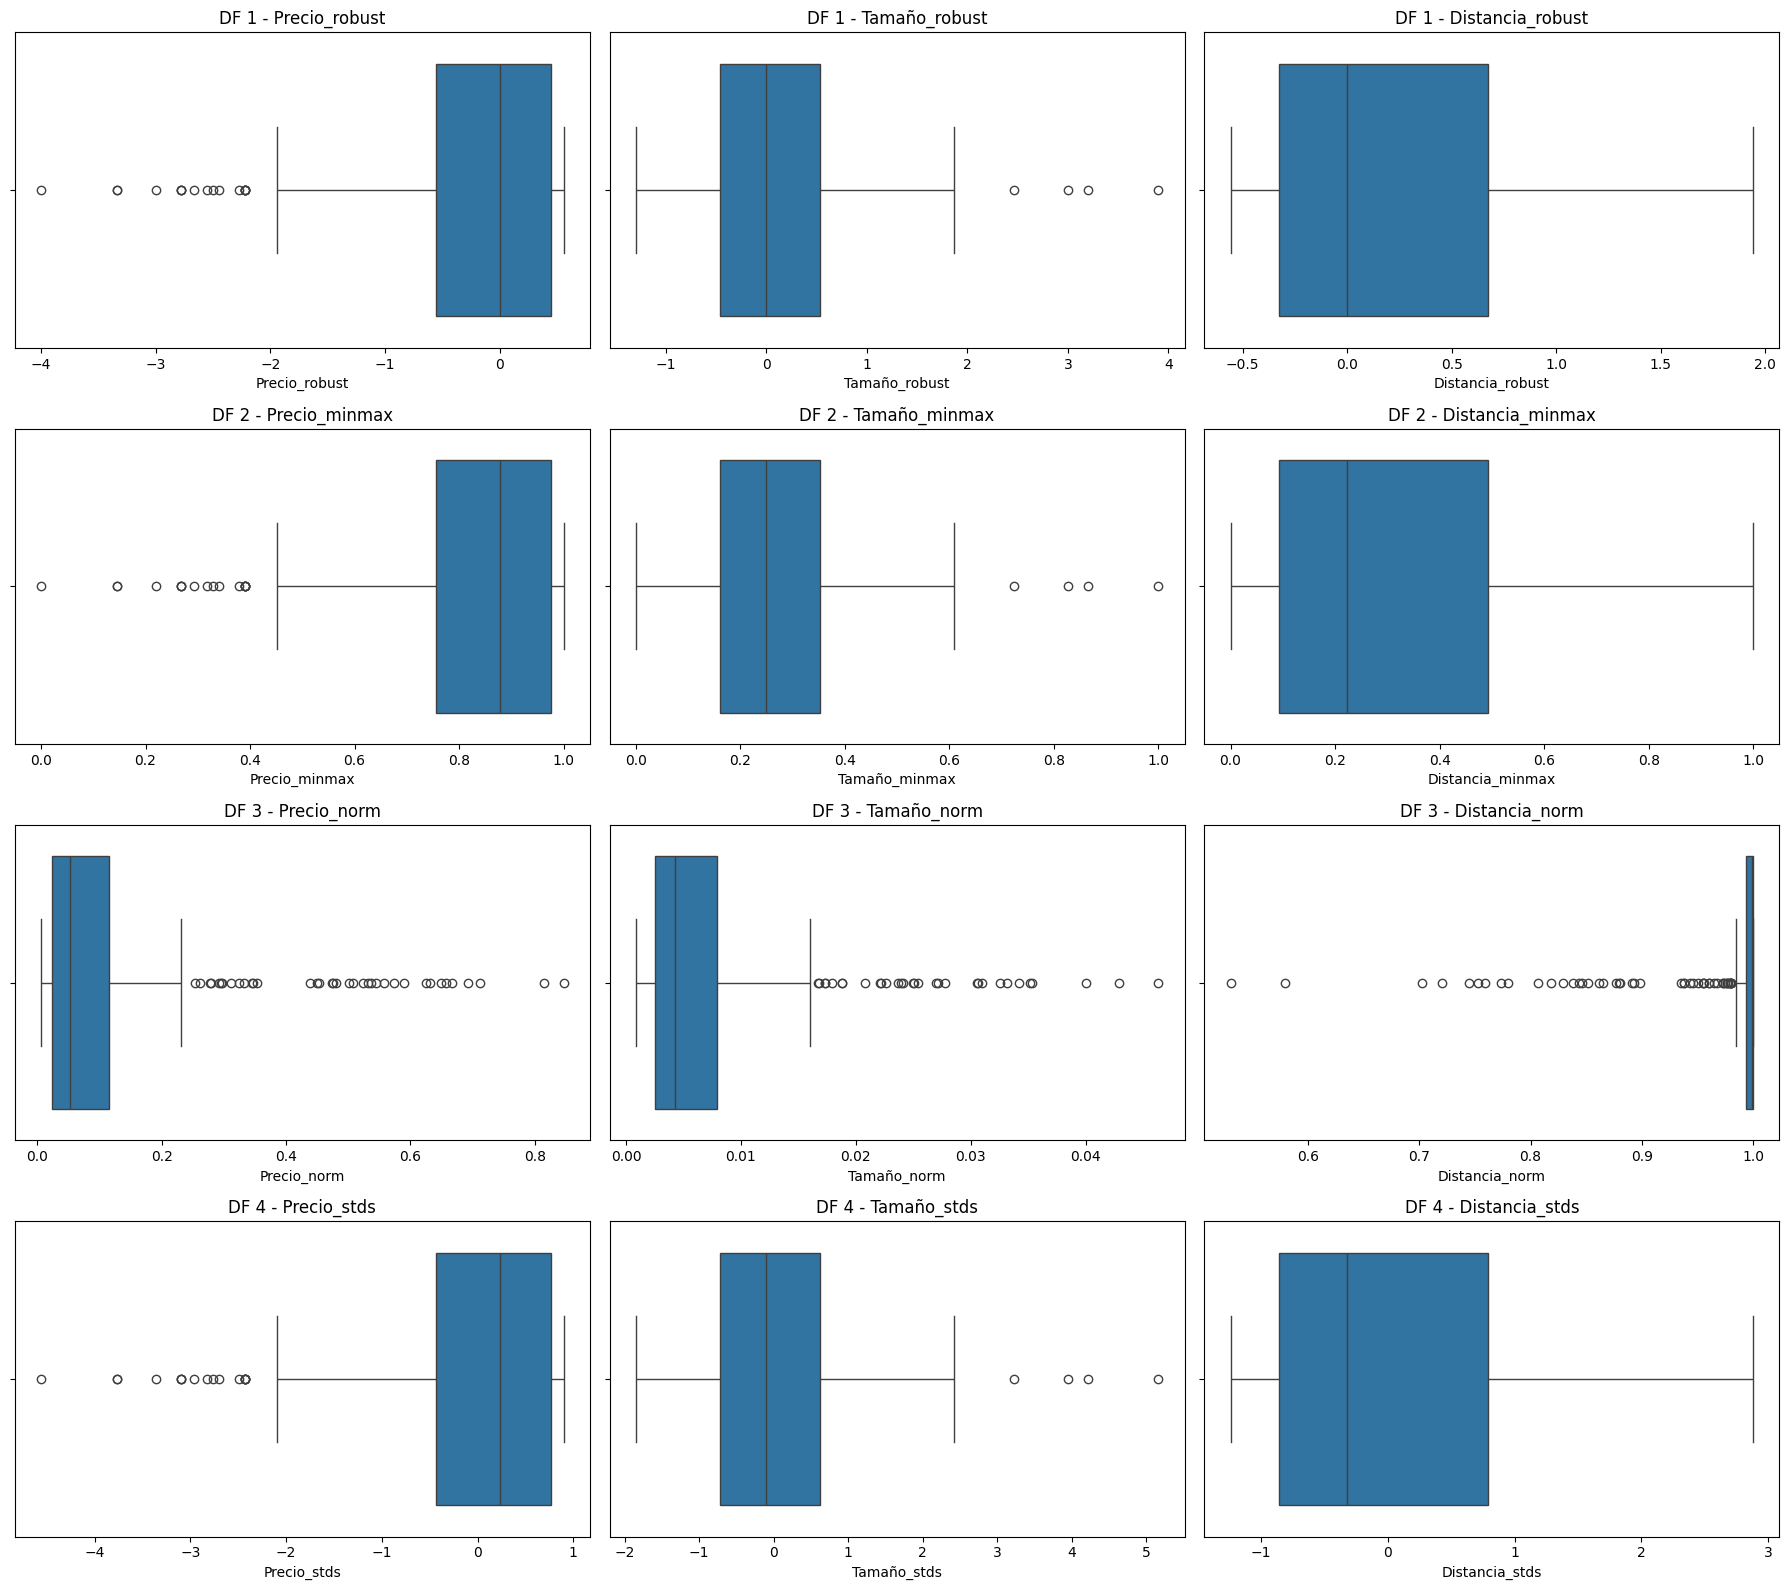

In [321]:
sp.generador_boxplots(df_list)

Una vez realizado la estandarizacion se opta por utilizar el metodo "Robust" para dar peso a los pocos outiers que hemos podido dejar en la muestra y que se tengan en cuenta en el modelo

In [322]:
df_estandarizado = pd.concat([df_final, df_scaled_robust], axis=1)
df_estandarizado=df_estandarizado.drop(columns=["Precio_robust","Tamaño","Distancia"])

In [323]:
df_estandarizado.sample(10)

Precio Tipo de Propiedad Exterior Habitaciones Baños Provincia  \
217   750.0              flat       No            1     1    Madrid   
288   750.0              flat       Sí            1     1    Madrid   
128   735.0            studio       Sí            0     1    Madrid   
133   750.0              flat       Sí            3     1    Madrid   
317   690.0              flat       Sí            2     1    Madrid   
231   740.0              flat       Sí            3     1    Madrid   
134   750.0              flat       Sí            1     1    Madrid   
219   495.0              flat       No            3     2    Toledo   
308   750.0              flat       Sí            1     1    Madrid   
49    750.0              flat       No            1     1    Madrid   

    Mostrar Dirección Tiene Video Tiene Plano Tiene 360 Ascensor  \
217                Sí          No          No        No       No   
288                No          No          Sí        No       Sí   
128                Sí          No          No        Sí       Sí   
133                No          Sí          Sí        No       No   
317                No          No          No        No       No   
231                No          Sí          Sí        Sí       Sí   
134                Sí          Sí          Sí        No       Sí   
219                No          No          No        No       Sí   
308                No          Sí          No        No       Sí   
49                 No          Sí          No        No       Sí   

     Tamaño_robust  Distancia_robust  
217      -0.433333         -0.337069  
288      -0.466667         -0.220378  
128      -0.966667         -0.103008  
133       0.366667          0.681958  
317       0.033333          0.654124  
231       0.466667          0.349563  
134      -0.333333         -0.218721  
219       1.033333          1.091481  
308      -0.766667         -0.398389  
49       -0.433333         -0.515718

Ahora procedemos con el Encoding de las variables categoricas

In [324]:
lista_col_categ = df_estandarizado.select_dtypes(include="O").columns.tolist()
lista_col_categ

['Tipo de Propiedad',
 'Exterior',
 'Habitaciones',
 'Baños',
 'Provincia',
 'Mostrar Dirección',
 'Tiene Video',
 'Tiene Plano',
 'Tiene 360',
 'Ascensor']

In [325]:
lista_col_num = df_estandarizado.select_dtypes(include=np.number).columns.tolist()
lista_col_num

['Precio', 'Tamaño_robust', 'Distancia_robust']

In [326]:
for column in df_estandarizado.select_dtypes(include="O").columns:
    print(f"Columna '{column.upper()}':")
    print(df[column].value_counts())
    print("\n-----------------------------")

Columna 'TIPO DE PROPIEDAD':
Tipo de Propiedad
flat            348
studio           48
duplex           19
penthouse        16
chalet            9
countryHouse      2
Name: count, dtype: int64

-----------------------------
Columna 'EXTERIOR':
Exterior
Sí    359
No     83
Name: count, dtype: int64

-----------------------------
Columna 'HABITACIONES':
Habitaciones
2    171
1    135
3     77
0     49
4      9
6      1
Name: count, dtype: int64

-----------------------------
Columna 'BAÑOS':
Baños
1    357
2     79
3      6
Name: count, dtype: int64

-----------------------------
Columna 'PROVINCIA':
Provincia
Madrid         353
Toledo          59
Guadalajara     21
Segovia          8
Ávila            1
Name: count, dtype: int64

-----------------------------
Columna 'MOSTRAR DIRECCIÓN':
Mostrar Dirección
No    340
Sí    102
Name: count, dtype: int64

-----------------------------
Columna 'TIENE VIDEO':
Tiene Video
No    306
Sí    118
Name: count, dtype: int64

--------------------------

c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:611: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:611: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\1-Preprocesing\../../src\support_preprocesing.py:611: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\no

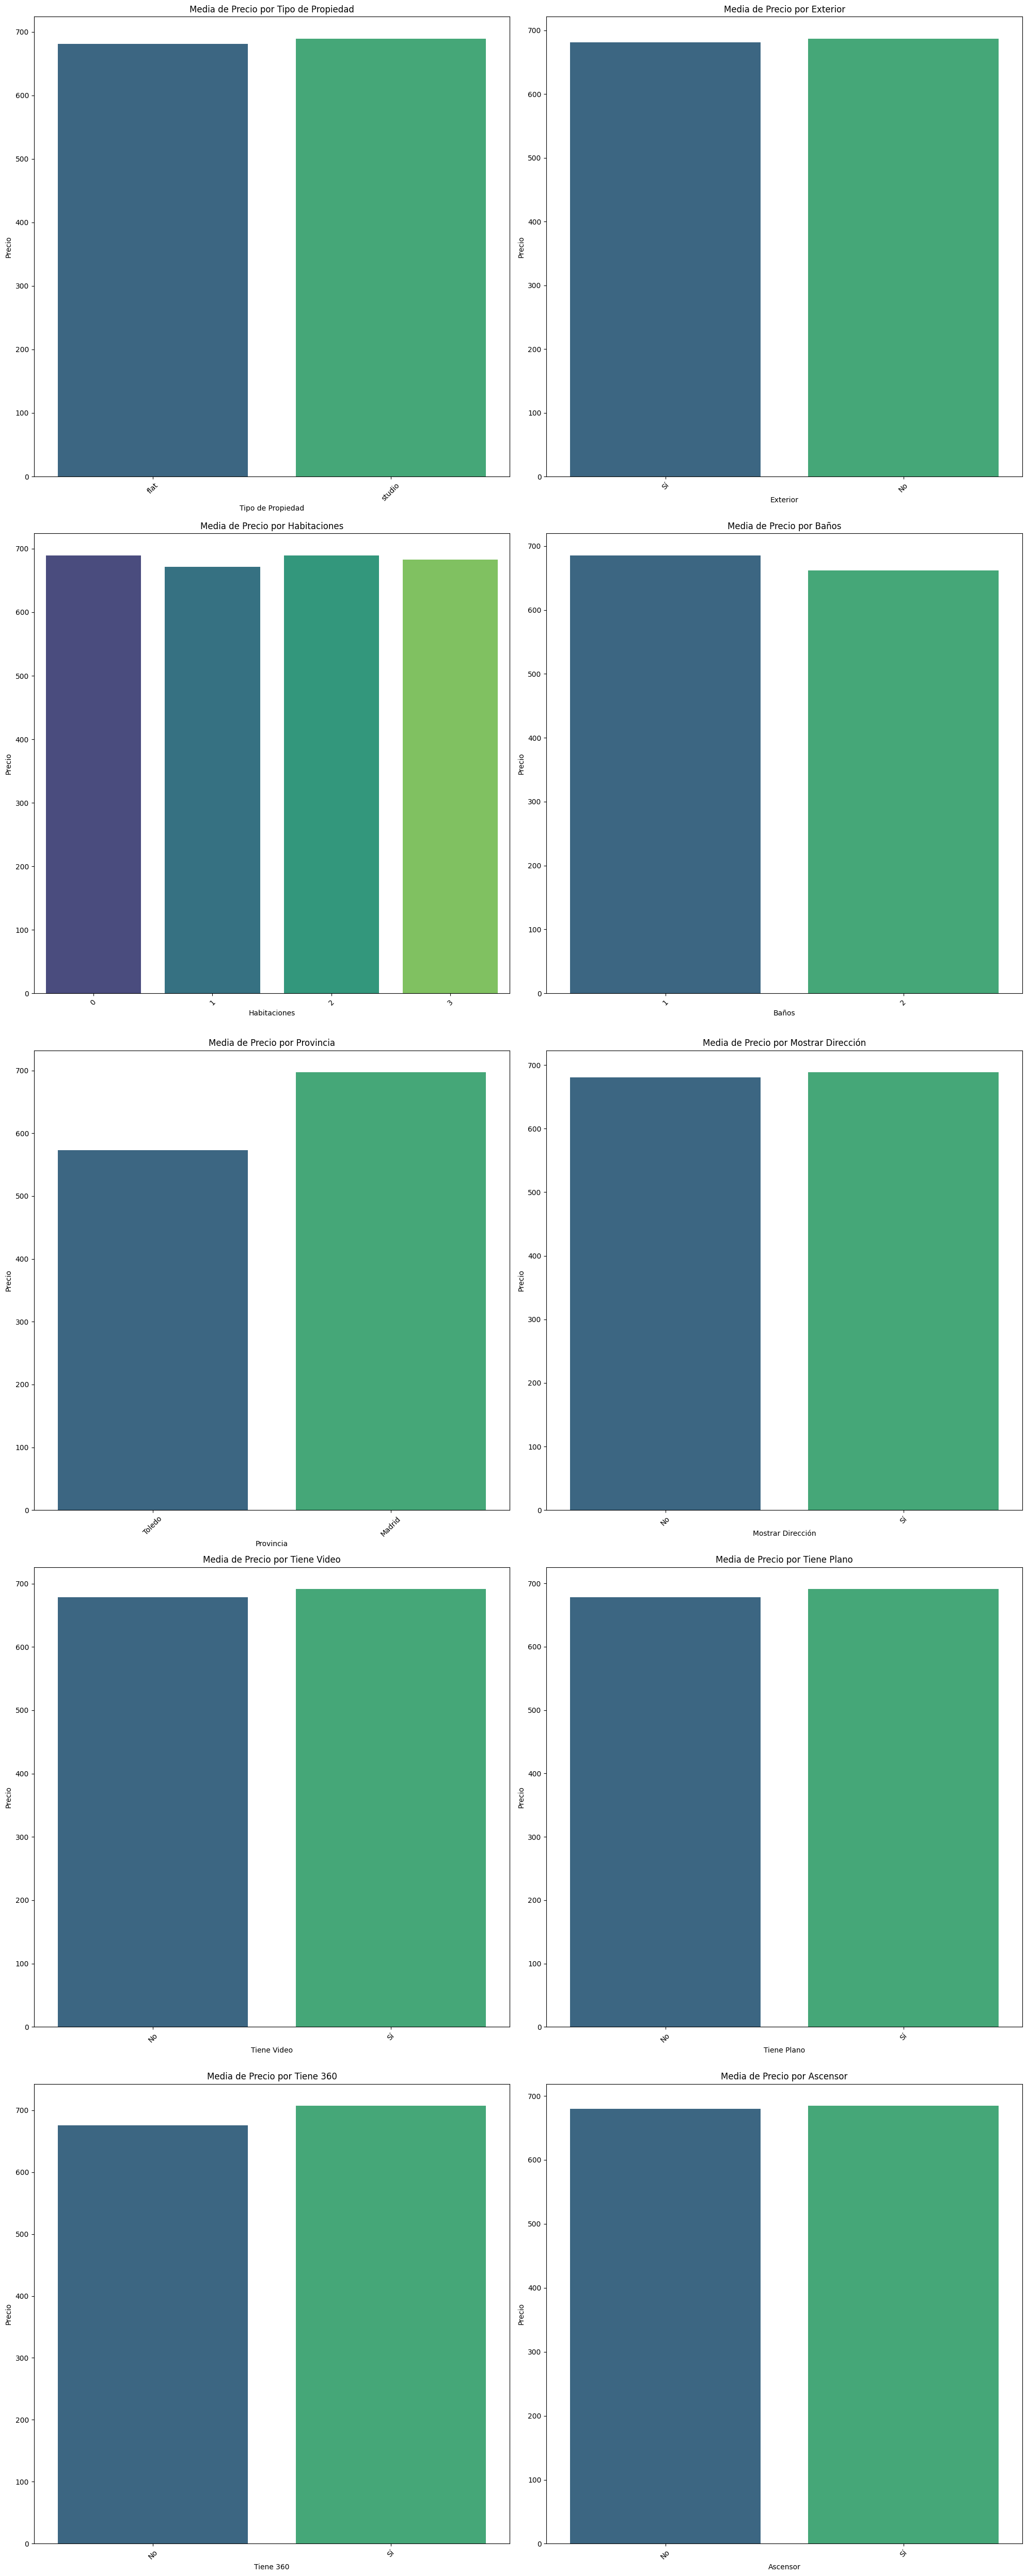

In [327]:
sp.crear_barplot(df_estandarizado,lista_col_categ,"Precio")

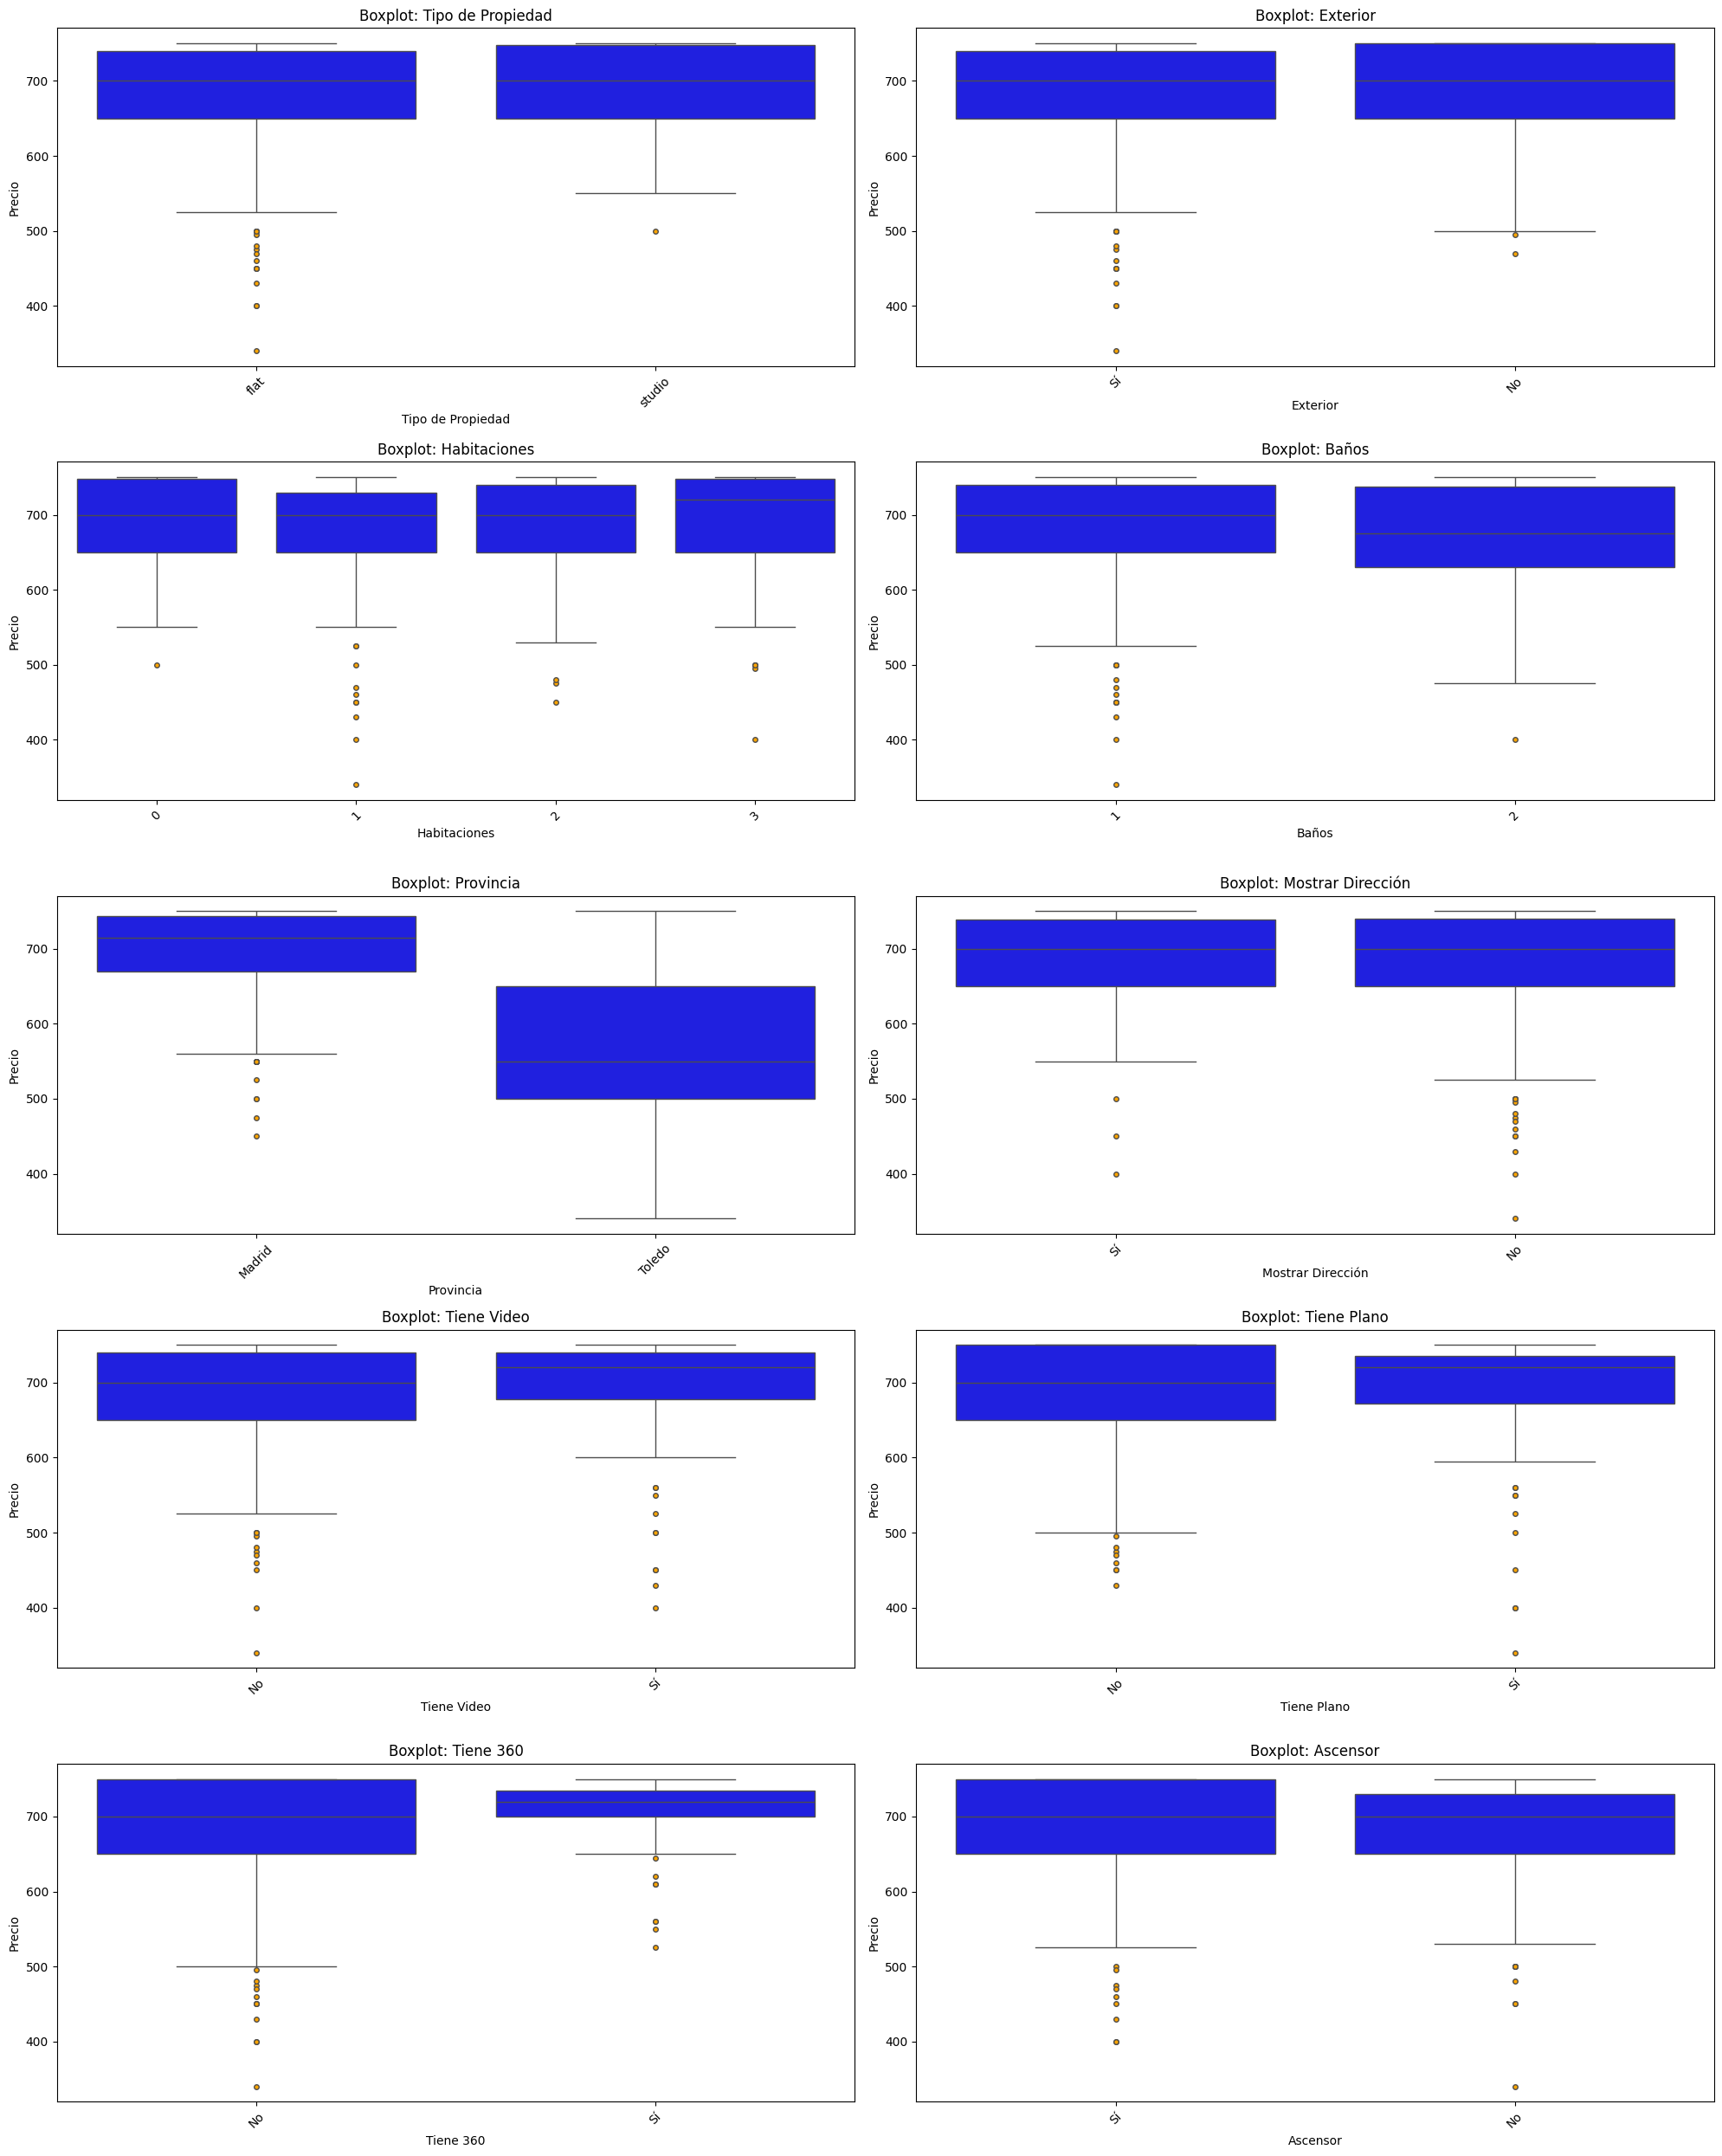

In [328]:
sp.crear_boxplot(df_estandarizado,lista_col_categ,"Precio")

In [329]:
df_estandarizado

Precio Tipo de Propiedad Exterior Habitaciones Baños Provincia  \
0     750.0              flat       Sí            1     1    Madrid   
1     750.0              flat       Sí            2     1    Madrid   
2     450.0              flat       Sí            2     1    Toledo   
3     590.0              flat       Sí            3     2    Madrid   
4     600.0              flat       Sí            2     1    Madrid   
..      ...               ...      ...          ...   ...       ...   
347   640.0              flat       Sí            2     1    Madrid   
348   700.0              flat       Sí            1     1    Madrid   
349   700.0              flat       Sí            1     1    Madrid   
350   700.0              flat       Sí            2     1    Madrid   
351   695.0              flat       No            2     1    Madrid   

    Mostrar Dirección Tiene Video Tiene Plano Tiene 360 Ascensor  \
0                  Sí          No          No        No       Sí   
1                  No          Sí          Sí        No       No   
2                  No          No          No        No       No   
3                  No          No          No        No       No   
4                  No          No          No        No       No   
..                ...         ...         ...       ...      ...   
347                Sí          No          No        No       Sí   
348                No          Sí          Sí        Sí       Sí   
349                Sí          No          No        No       Sí   
350                Sí          No          No        No       No   
351                Sí          No          No        No       No   

     Tamaño_robust  Distancia_robust  
0         0.033333         -0.279404  
1         0.366667          0.107640  
2         0.033333          1.046436  
3         0.366667          1.826600  
4         0.466667          0.996505  
..             ...               ...  
347       0.333333          0.667127  
348      -0.166667         -0.083120  
349       0.000000         -0.258496  
350       0.533333          0.711662  
351       0.100000          0.065867  

[352 rows x 13 columns]

In [330]:
df_le=sp.label_encoding(df_estandarizado, lista_col_categ)
df_le.to_csv('../../data/df_le.csv', index=False)
df_le

Precio  Tipo de Propiedad  Exterior  Habitaciones  Baños  Provincia  \
0     750.0                  0         1             1      0          0   
1     750.0                  0         1             2      0          0   
2     450.0                  0         1             2      0          1   
3     590.0                  0         1             3      1          0   
4     600.0                  0         1             2      0          0   
..      ...                ...       ...           ...    ...        ...   
347   640.0                  0         1             2      0          0   
348   700.0                  0         1             1      0          0   
349   700.0                  0         1             1      0          0   
350   700.0                  0         1             2      0          0   
351   695.0                  0         0             2      0          0   

     Mostrar Dirección  Tiene Video  Tiene Plano  Tiene 360  Ascensor  \
0                    1            0            0          0         1   
1                    0            1            1          0         0   
2                    0            0            0          0         0   
3                    0            0            0          0         0   
4                    0            0            0          0         0   
..                 ...          ...          ...        ...       ...   
347                  1            0            0          0         1   
348                  0            1            1          1         1   
349                  1            0            0          0         1   
350                  1            0            0          0         0   
351                  1            0            0          0         0   

     Tamaño_robust  Distancia_robust  
0         0.033333         -0.279404  
1         0.366667          0.107640  
2         0.033333          1.046436  
3         0.366667          1.826600  
4         0.466667          0.996505  
..             ...               ...  
347       0.333333          0.667127  
348      -0.166667         -0.083120  
349       0.000000         -0.258496  
350       0.533333          0.711662  
351       0.100000          0.065867  

[352 rows x 13 columns]

In [331]:
df_te=sp.target_encoding(df_estandarizado, lista_col_categ, "Precio")
df_te.to_csv('../../data/df_te.csv', index=False)
df_te

Precio  Tipo de Propiedad    Exterior  Habitaciones       Baños  \
0     750.0         681.418301  681.494810    671.204570  685.558824   
1     750.0         681.418301  681.494810    689.131332  685.558824   
2     450.0         681.418301  681.494810    689.131332  685.558824   
3     590.0         681.418301  681.494810    683.142537  663.395530   
4     600.0         681.418301  681.494810    689.131332  685.558824   
..      ...                ...         ...           ...         ...   
347   640.0         681.418301  681.494810    689.131332  685.558824   
348   700.0         681.418301  681.494810    671.204570  685.558824   
349   700.0         681.418301  681.494810    671.204570  685.558824   
350   700.0         681.418301  681.494810    689.131332  685.558824   
351   695.0         681.418301  686.923794    689.131332  685.558824   

      Provincia  Mostrar Dirección  Tiene Video  Tiene Plano   Tiene 360  \
0    697.296774         688.751480   678.348548   677.895197  675.286765   
1    697.296774         680.507463   691.440441   691.007843  675.286765   
2    584.006150         680.507463   678.348548   677.895197  675.286765   
3    697.296774         680.507463   678.348548   677.895197  675.286765   
4    697.296774         680.507463   678.348548   677.895197  675.286765   
..          ...                ...          ...          ...         ...   
347  697.296774         688.751480   678.348548   677.895197  675.286765   
348  697.296774         680.507463   691.440441   691.007843  706.864550   
349  697.296774         688.751480   678.348548   677.895197  675.286765   
350  697.296774         688.751480   678.348548   677.895197  675.286765   
351  697.296774         688.751480   678.348548   677.895197  675.286765   

       Ascensor  Tamaño_robust  Distancia_robust  
0    684.527919       0.033333         -0.279404  
1    679.870971       0.366667          0.107640  
2    679.870971       0.033333          1.046436  
3    679.870971       0.366667          1.826600  
4    679.870971       0.466667          0.996505  
..          ...            ...               ...  
347  684.527919       0.333333          0.667127  
348  684.527919      -0.166667         -0.083120  
349  684.527919       0.000000         -0.258496  
350  679.870971       0.533333          0.711662  
351  679.870971       0.100000          0.065867  

[352 rows x 13 columns]

In [332]:
df_fe=sp.frequency_encoding(df_estandarizado, lista_col_categ)
df_fe.to_csv('../../data/df_fe.csv', index=False)
df_fe

Precio  Tipo de Propiedad  Exterior  Habitaciones     Baños  Provincia  \
0     750.0           0.869318  0.821023      0.321023  0.869318   0.880682   
1     750.0           0.869318  0.821023      0.389205  0.869318   0.880682   
2     450.0           0.869318  0.821023      0.389205  0.869318   0.119318   
3     590.0           0.869318  0.821023      0.159091  0.130682   0.880682   
4     600.0           0.869318  0.821023      0.389205  0.869318   0.880682   
..      ...                ...       ...           ...       ...        ...   
347   640.0           0.869318  0.821023      0.389205  0.869318   0.880682   
348   700.0           0.869318  0.821023      0.321023  0.869318   0.880682   
349   700.0           0.869318  0.821023      0.321023  0.869318   0.880682   
350   700.0           0.869318  0.821023      0.389205  0.869318   0.880682   
351   695.0           0.869318  0.178977      0.389205  0.869318   0.880682   

     Mostrar Dirección  Tiene Video  Tiene Plano  Tiene 360  Ascensor  \
0             0.238636     0.684659     0.650568   0.772727  0.559659   
1             0.761364     0.315341     0.349432   0.772727  0.440341   
2             0.761364     0.684659     0.650568   0.772727  0.440341   
3             0.761364     0.684659     0.650568   0.772727  0.440341   
4             0.761364     0.684659     0.650568   0.772727  0.440341   
..                 ...          ...          ...        ...       ...   
347           0.238636     0.684659     0.650568   0.772727  0.559659   
348           0.761364     0.315341     0.349432   0.227273  0.559659   
349           0.238636     0.684659     0.650568   0.772727  0.559659   
350           0.238636     0.684659     0.650568   0.772727  0.440341   
351           0.238636     0.684659     0.650568   0.772727  0.440341   

     Tamaño_robust  Distancia_robust  
0         0.033333         -0.279404  
1         0.366667          0.107640  
2         0.033333          1.046436  
3         0.366667          1.826600  
4         0.466667          0.996505  
..             ...               ...  
347       0.333333          0.667127  
348      -0.166667         -0.083120  
349       0.000000         -0.258496  
350       0.533333          0.711662  
351       0.100000          0.065867  

[352 rows x 13 columns]